CUSTOMERS DATA:

In [169]:
import pandas as pd
customers = pd.read_csv("Customers.csv")
customers.head(3)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [170]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [171]:
# Check for nulls
print("Null values in CustomerID:", customers['CustomerID'].isnull().sum())

# Check for duplicates
print("Duplicate CustomerIDs:", customers['CustomerID'].duplicated().sum())

Null values in CustomerID: 0
Duplicate CustomerIDs: 0


In [172]:
# Check for nulls
print("Null values in CustomerName:", customers['CustomerName'].isnull().sum())

# Count unique names
print("Unique Customer Names:", customers['CustomerName'].nunique())

# Check duplicates (if any)
print("Duplicate Names:", customers['CustomerName'].duplicated().sum())


Null values in CustomerName: 0
Unique Customer Names: 200
Duplicate Names: 0


In [173]:
# Count of unique regions
print("Unique Regions:", customers['Region'].nunique())

# Most common region (mode)
print("Most Common Region:", customers['Region'].mode()[0])

# Frequency distribution of regions
print("Region Frequency:\n", customers['Region'].value_counts())

# Check for nulls
print("Null values in Region:", customers['Region'].isnull().sum())


Unique Regions: 4
Most Common Region: South America
Region Frequency:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
Null values in Region: 0


In [174]:
# Create a new column for datetime-converted values
customers['SignupDateConverted'] = pd.to_datetime(customers['SignupDate'])

# Null values in the new column
print("Null values in SignupDateConverted:", customers['SignupDateConverted'].isnull().sum())

# Range of dates in the new column
print("Earliest Signup Date:", customers['SignupDateConverted'].min())
print("Latest Signup Date:", customers['SignupDateConverted'].max())

# Quartiles (date distribution) in the new column
print("Signup Date Quartiles:\n", customers['SignupDateConverted'].quantile([0.25, 0.5, 0.75]))


Null values in SignupDateConverted: 0
Earliest Signup Date: 2022-01-22 00:00:00
Latest Signup Date: 2024-12-28 00:00:00
Signup Date Quartiles:
 0.25   2022-09-26 12:00:00
0.50   2023-08-31 12:00:00
0.75   2024-04-12 12:00:00
Name: SignupDateConverted, dtype: datetime64[ns]


          Region Earliest Signup Date
0           Asia           2022-02-13
1         Europe           2022-02-13
2  North America           2022-02-02
3  South America           2022-01-22
Quartiles Information:
                   25th Percentile              Median     75th Percentile
Region                                                                   
Asia          2022-10-06 00:00:00 2023-10-11 00:00:00 2024-05-27 00:00:00
Europe        2022-10-28 00:00:00 2023-05-16 12:00:00 2024-02-19 06:00:00
North America 2023-04-27 06:00:00 2024-01-29 00:00:00 2024-07-20 12:00:00
South America 2022-08-11 12:00:00 2023-03-11 00:00:00 2024-03-22 12:00:00


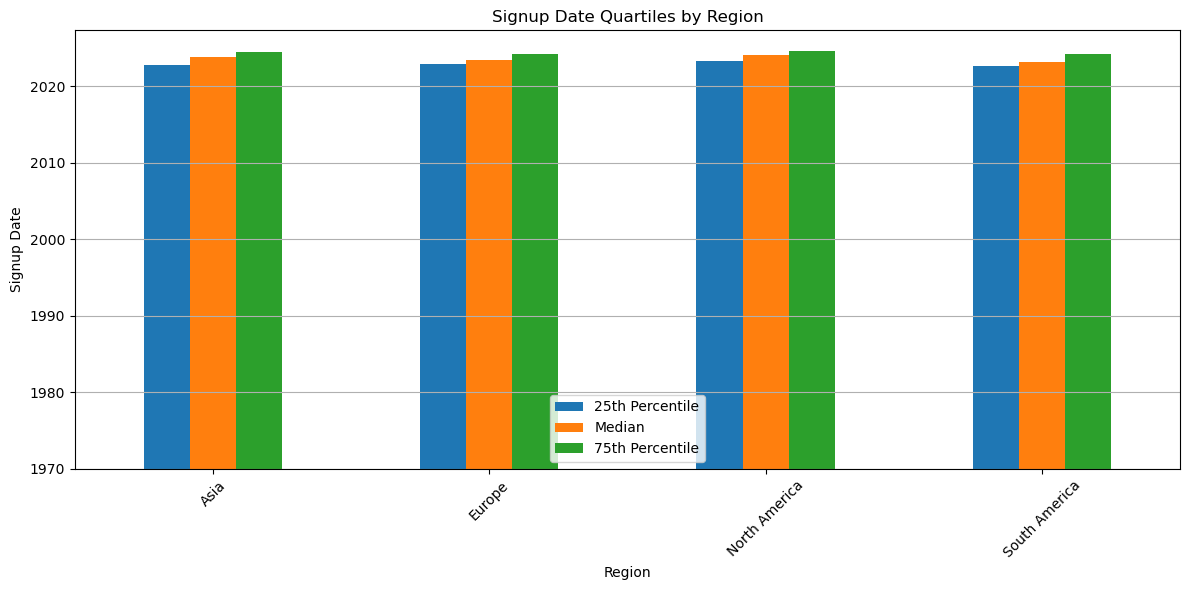

In [175]:
import matplotlib.pyplot as plt
# Group by 'Region' and get the earliest signup date for each region
earliest_signups = customers.groupby('Region')['SignupDateConverted'].min().reset_index()
earliest_signups.columns = ['Region', 'Earliest Signup Date']

# Print the earliest signup dates for each region
print(earliest_signups)

# Calculate quartiles for each region
quartiles_info = customers.groupby('Region')['SignupDateConverted'].quantile([0.25, 0.5, 0.75]).unstack()
quartiles_info.columns = ['25th Percentile', 'Median', '75th Percentile']

# Print quartiles information
print("Quartiles Information:\n", quartiles_info)

# Plotting the quartiles for each region
quartiles_info.plot(kind='bar', figsize=(12, 6))
plt.title('Signup Date Quartiles by Region')
plt.xlabel('Region')
plt.ylabel('Signup Date')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Signups per Year:
 SignupDateConverted
2022    64
2023    57
2024    79
Name: count, dtype: int64


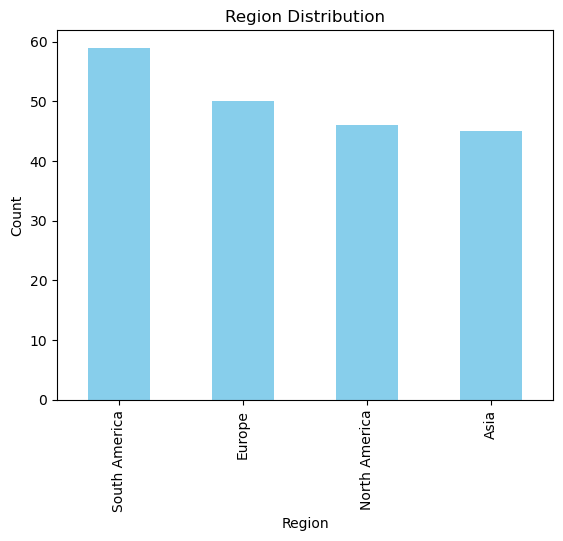

In [176]:
# Group by year and count signups using the new column
signup_trends = customers['SignupDateConverted'].dt.year.value_counts().sort_index()
print("Signups per Year:\n", signup_trends)

# Plot the region frequency
customers['Region'].value_counts().plot(kind="bar", color='skyblue')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


/var/folders/pr/bcgft4yx0sz6kl3232ccx7s40000gn/T/ipykernel_25008/2219302541.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_years))


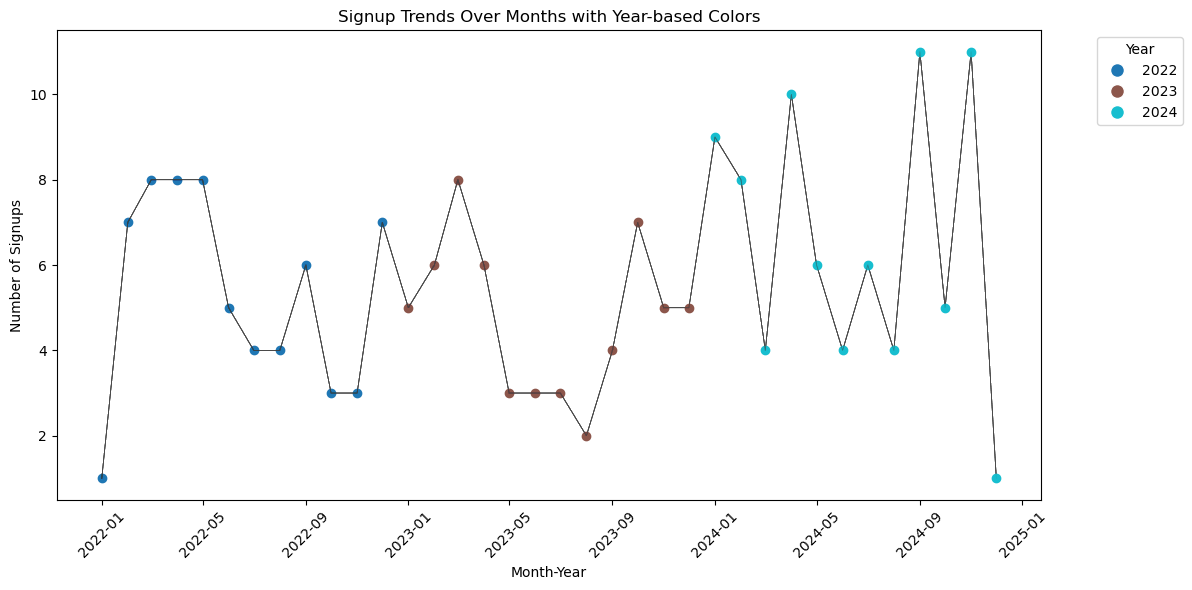

In [177]:
# Extract the 'Month-Year' for plotting
customers['Month_Year'] = customers['SignupDateConverted'].dt.to_period('M')

# Group by 'Month_Year' and count signups
signup_trends = customers.groupby('Month_Year').size()

# Get unique years from the 'Month_Year' column
unique_years = signup_trends.index.year.unique()

# Define a color map for each unique year
colors = plt.cm.get_cmap('tab10', len(unique_years))

# Create a dictionary to map each year to a color
year_to_color = {year: colors(i) for i, year in enumerate(unique_years)}

# Plotting with year-based colors
plt.figure(figsize=(12, 6))

# Prepare data for plotting
x_values = signup_trends.index.to_timestamp()  # Convert Period to Timestamp
y_values = signup_trends.values

# Plot the line with year-based colors
for month_year, count in signup_trends.items():
    year = month_year.year
    color = year_to_color[year]
    plt.plot(month_year.to_timestamp(), count, marker='o', color=color)  # Plot each point
    plt.plot(x_values, y_values, color="#424242", linewidth=0.5, alpha=0.1)  # Thinner line, more transparent, and different color

# Customize title and labels
plt.title('Signup Trends Over Months with Year-based Colors')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend for years with their corresponding color
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=year_to_color[year], markersize=10) for year in unique_years]
labels = [str(year) for year in unique_years]
plt.legend(handles, labels, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


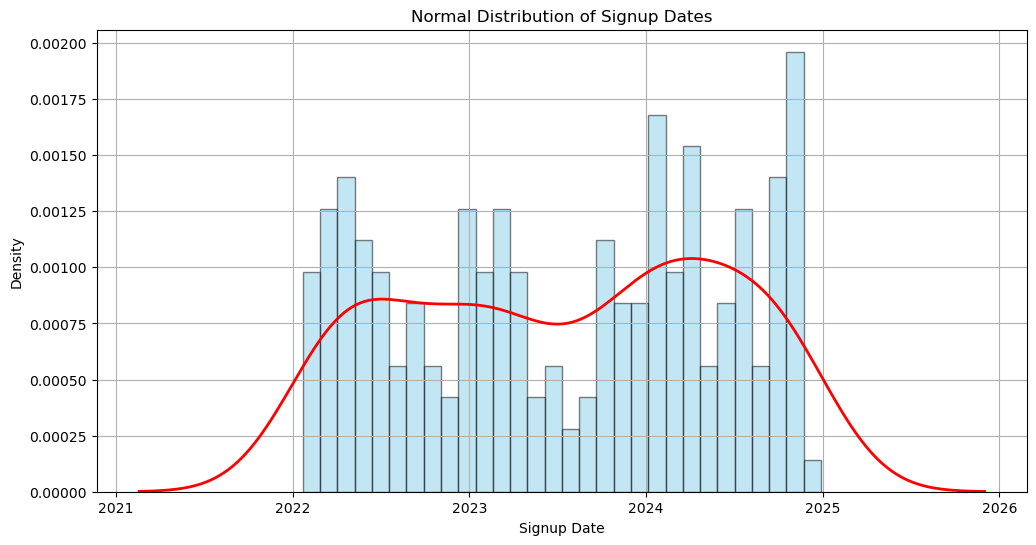

Mean: 1689755472.0
Median: 1693483200.0
Mode: 1650067200
Skewness: -0.10196599018569091
Kurtosis: -1.3315910677005558
P-value (Shapiro-Wilk test): 6.284981424187208e-08


In [178]:
plt.figure(figsize=(12, 6))

# Histogram of SignupDateConverted
customers['SignupDateConverted'].hist(bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')

# Kernel Density Estimate (KDE) plot
import seaborn as sns
sns.kdeplot(customers['SignupDateConverted'], color='red', linewidth=2)

# Customize title and labels
plt.title('Normal Distribution of Signup Dates')
plt.xlabel('Signup Date')
plt.ylabel('Density')

# Show the plot
plt.show()
# Convert SignupDateConverted to numeric (e.g., timestamp)
signup_date_numeric = customers['SignupDateConverted'].astype('int64') // 10**9  # Convert datetime to Unix timestamp

# Calculate statistics
mean_signup_date = signup_date_numeric.mean()
median_signup_date = signup_date_numeric.median()
mode_signup_date = signup_date_numeric.mode()[0]
skewness_signup_date = signup_date_numeric.skew()
kurtosis_signup_date = signup_date_numeric.kurtosis()

from scipy import stats
# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(signup_date_numeric)
p_value = shapiro_test.pvalue

# Print the results
print(f"Mean: {mean_signup_date}")
print(f"Median: {median_signup_date}")
print(f"Mode: {mode_signup_date}")
print(f"Skewness: {skewness_signup_date}")
print(f"Kurtosis: {kurtosis_signup_date}")
print(f"P-value (Shapiro-Wilk test): {p_value}")

/var/folders/pr/bcgft4yx0sz6kl3232ccx7s40000gn/T/ipykernel_25008/1400071869.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_years))


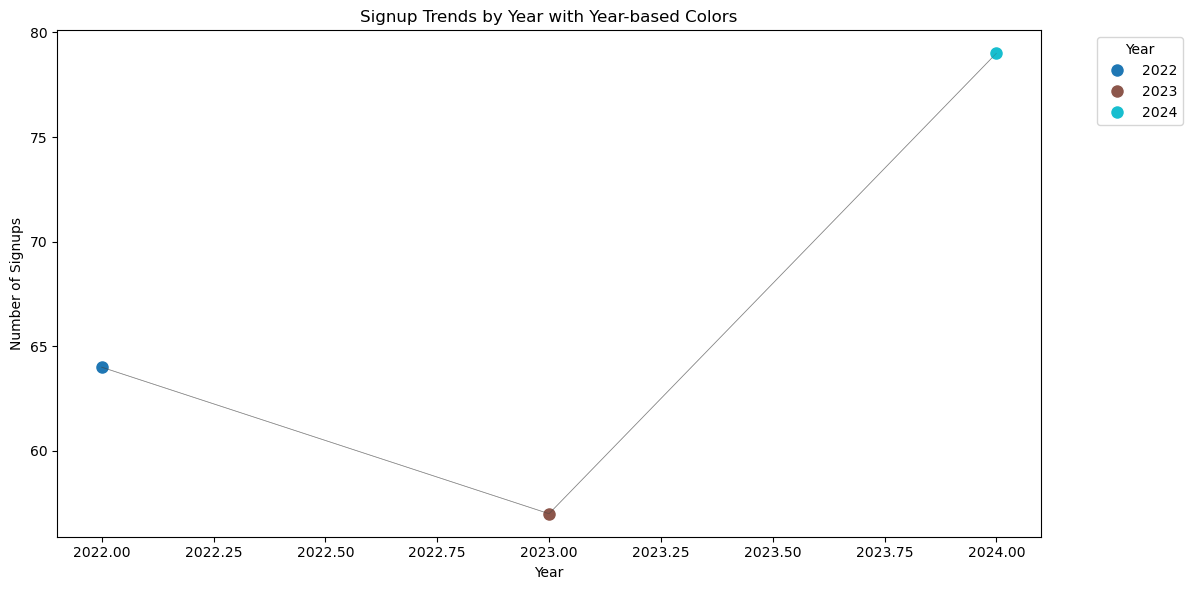

In [179]:
# Group by 'Year' and count total signups per year
signup_trends_by_year = customers.groupby(customers['SignupDateConverted'].dt.year).size()

# Get unique years from the 'Month_Year' column
unique_years = signup_trends_by_year.index.unique()

# Define a color map for each unique year
colors = plt.cm.get_cmap('tab10', len(unique_years))

# Create a dictionary to map each year to a color
year_to_color = {year: colors(i) for i, year in enumerate(unique_years)}

# Plotting the total signups per year with year-based colors
plt.figure(figsize=(12, 6))

# Prepare data for plotting
x_values = signup_trends_by_year.index  # Years
y_values = signup_trends_by_year.values  # Signup counts

# Plot the year-based colors
for year, count in signup_trends_by_year.items():
    color = year_to_color[year]
    plt.plot(year, count, marker='o', color=color, markersize=8)  # Use year-based colors for markers
    plt.plot(x_values, y_values, color="#424242", linewidth=0.5, alpha=0.3)  # Thinner line, more transparent, and different color

# Customize title and labels
plt.title('Signup Trends by Year with Year-based Colors')
plt.xlabel('Year')
plt.ylabel('Number of Signups')

# Add a legend for years with their corresponding color
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=year_to_color[year], markersize=10) for year in unique_years]
labels = [str(year) for year in unique_years]
plt.legend(handles, labels, title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


In [180]:
# Import necessary libraries for ANOVA and multiple comparisons
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for ANOVA
customers['Region'] = customers['Region'].astype('category')  # Ensure 'Region' is treated as a categorical variable

# Ensure 'SignupDateConverted' is numeric and drop rows with null values
customers['SignupDateConverted'] = pd.to_numeric(customers['SignupDateConverted'], errors='coerce')  # Convert to numeric
customers = customers.dropna(subset=['SignupDateConverted'])  # Drop rows with null values

# Perform ANOVA
model = ols('SignupDateConverted ~ Region', data=customers).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print("ANOVA Test Results:")
print(anova_table)

# Perform Tukey's HSD test for multiple comparisons
tukey_results = pairwise_tukeyhsd(endog=customers['SignupDateConverted'], groups=customers['Region'], alpha=0.05)

# Print the results of the Tukey's HSD test
print("\nTukey's HSD Test Results:")
print(tukey_results)

ANOVA Test Results:
                sum_sq     df         F    PR(>F)
Region    6.197942e+33    3.0  2.677774  0.048275
Residual  1.512197e+35  196.0       NaN       NaN

Tukey's HSD Test Results:
                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
    group1        group2            meandiff        p-adj           lower                  upper         reject
---------------------------------------------------------------------------------------------------------------
         Asia        Europe     -2431872000000000.0  0.974  -1.722121576903139e+16 1.235747176903139e+16  False
         Asia North America      8442657391304448.0 0.4701     -6648198914682874.0 2.353351369729177e+16  False
         Asia South America     -6780105762711808.0 0.6065  -2.102511605344757e+16    7464904528023953.0  False
       Europe North America  1.0874529391304448e+16 0.2245     -3829963741914178.5 2.557902252452307e+16  False
       Europe South

Signup Dates Across Regions Analysis:

Unique Regions: 4
Regions: South America, Asia, North America, Europe

Signup Date Range for Each Region:
          Region EarliestSignupDate LatestSignupDate
0           Asia         2022-02-13       2024-11-13
1         Europe         2022-02-13       2024-12-28
2  North America         2022-02-02       2024-11-22
3  South America         2022-01-22       2024-11-22

Summary Statistics of Signup Dates by Region (Numeric):
               count          mean           std           min           25%  \
Region                                                                         
Asia            45.0  1.690422e+09  2.829981e+07  1.644710e+09  1.665014e+09   
Europe          50.0  1.687990e+09  2.741994e+07  1.644710e+09  1.666915e+09   
North America   46.0  1.698864e+09  2.840415e+07  1.643760e+09  1.682575e+09   
South America   59.0  1.683642e+09  2.717581e+07  1.642810e+09  1.660219e+09   

                        50%           75%           

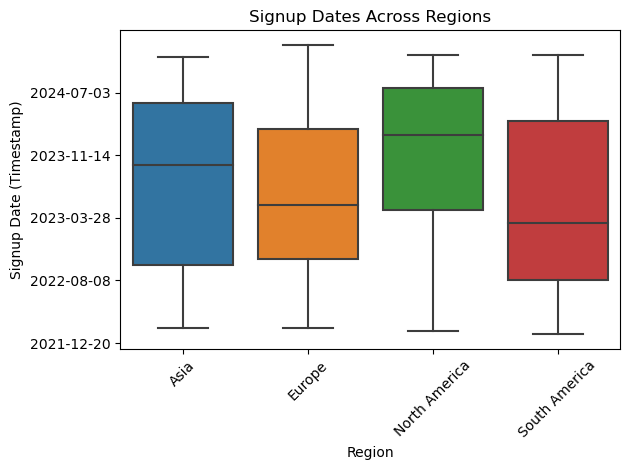

In [181]:
# Before plotting, print details about the data being visualized
print("Signup Dates Across Regions Analysis:\n")

# Print unique regions in the dataset
unique_regions = customers['Region'].unique()
print(f"Unique Regions: {len(unique_regions)}")
print(f"Regions: {', '.join(unique_regions)}")

# Ensure 'SignupDateConverted' is numeric and create 'SignupDateNumeric'
customers['SignupDateNumeric'] = customers['SignupDateConverted'].astype('int64') // 10**9  # Convert datetime to Unix timestamp

# Print the range of signup dates for each region
signup_date_range = (
    customers.groupby('Region')['SignupDateNumeric']
    .agg(['min', 'max'])
    .reset_index()
    .rename(columns={'min': 'EarliestSignupDate', 'max': 'LatestSignupDate'})
)
signup_date_range['EarliestSignupDate'] = pd.to_datetime(signup_date_range['EarliestSignupDate'], unit='s')
signup_date_range['LatestSignupDate'] = pd.to_datetime(signup_date_range['LatestSignupDate'], unit='s')
print("\nSignup Date Range for Each Region:")
print(signup_date_range)

# Print summary statistics for SignupDateNumeric by region
summary_stats = customers.groupby('Region')['SignupDateNumeric'].describe()
print("\nSummary Statistics of Signup Dates by Region (Numeric):")
print(summary_stats)

# Continue with the plotting code
sns.boxplot(data=customers, x='Region', y='SignupDateNumeric')
plt.title('Signup Dates Across Regions')
plt.xlabel('Region')
plt.ylabel('Signup Date (Timestamp)')

# Format y-axis ticks as readable dates
import matplotlib.dates as mdates
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x, unit='s').strftime('%Y-%m-%d')))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

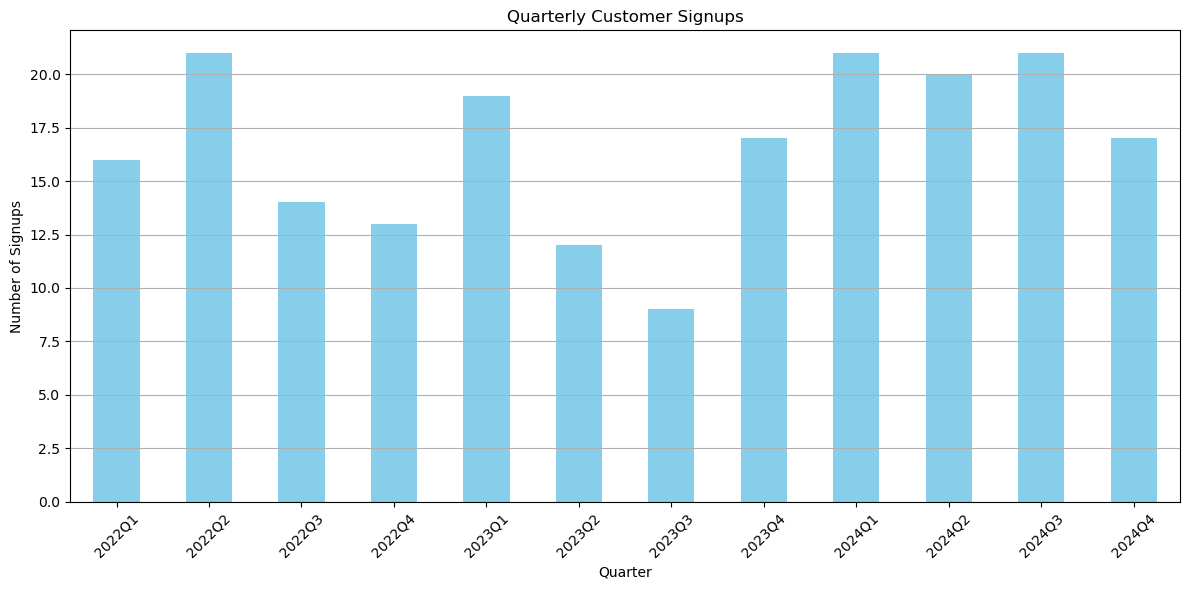

In [182]:
# Ensure 'SignupDateConverted' is properly converted to datetime and drop nulls
customers['SignupDateConverted'] = pd.to_datetime(customers['SignupDateConverted'], errors='coerce')  # Convert to datetime
customers = customers.dropna(subset=['SignupDateConverted'])  # Drop rows with null values

# Quarterly Signup Trends
# Extract quarter and year for grouping
customers['SignupQuarter'] = customers['SignupDateConverted'].dt.to_period('Q')

# Calculate quarterly signups
quarterly_signups = customers['SignupQuarter'].value_counts().sort_index()

# Plotting Quarterly Signup Trends
plt.figure(figsize=(12, 6))
quarterly_signups.plot(kind='bar', color='skyblue')
plt.title('Quarterly Customer Signups')
plt.xlabel('Quarter')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

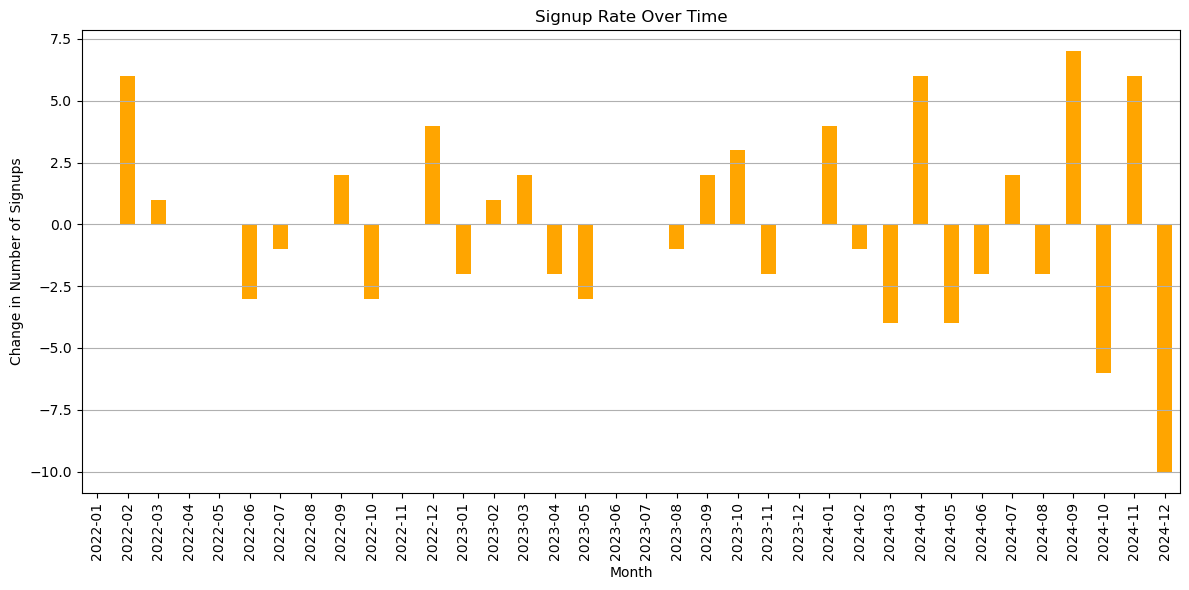

In [183]:
# Calculate monthly signups
monthly_signups = customers['SignupDateConverted'].dt.to_period('M').value_counts().sort_index()  # Count signups per month

# Calculate Signup Rate
signup_rate = monthly_signups.diff().fillna(0)  # Calculate the difference in signups

# Plotting Signup Rate
plt.figure(figsize=(12, 6))
signup_rate.plot(kind='bar', color='orange')
plt.title('Signup Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Change in Number of Signups')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

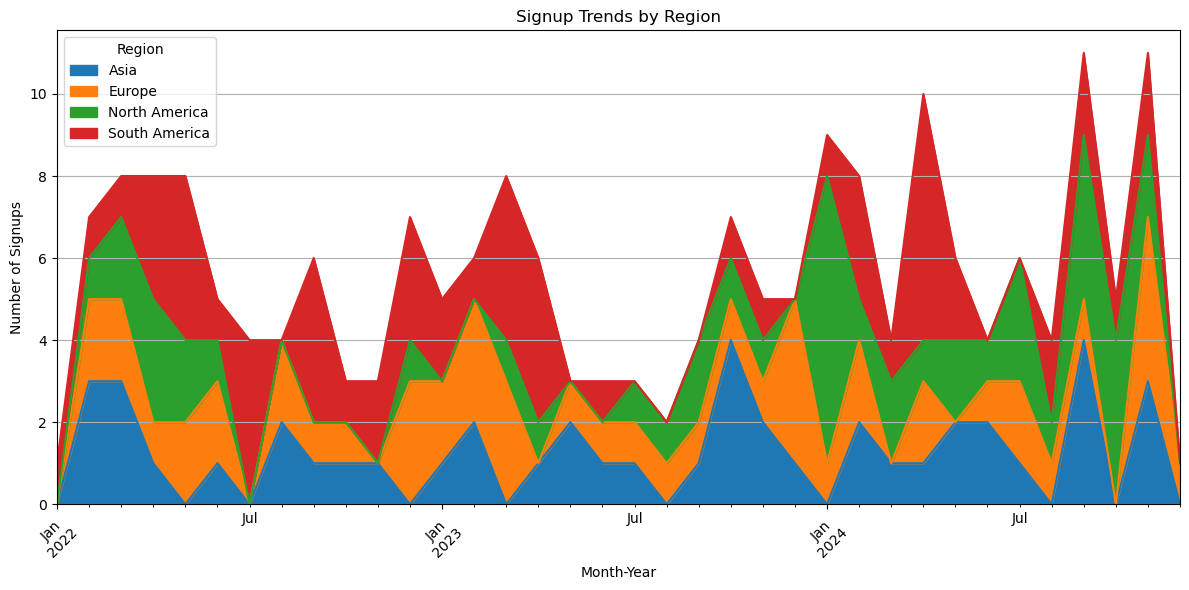

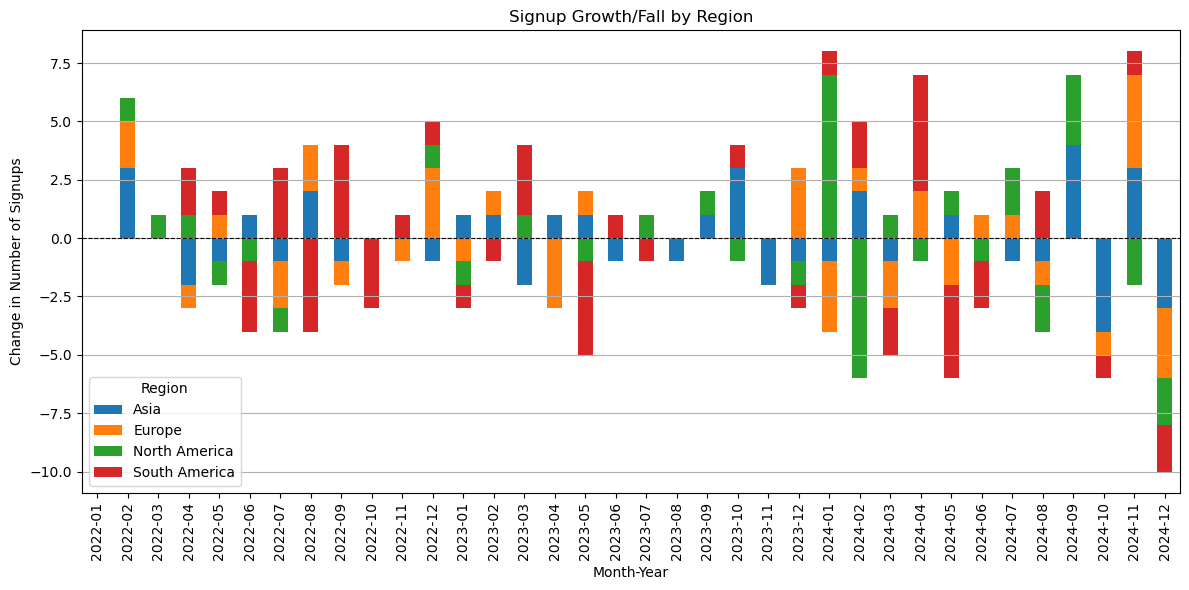

In [184]:
# Group by 'Month_Year' and 'Region' to count signups
signup_trends_by_region = customers.groupby(['Month_Year', 'Region']).size().unstack(fill_value=0)

# Plotting the signup trends by region using bar plots
plt.figure(figsize=(12, 6))

# Plot each region's signup trend as a bar plot
signup_trends_by_region.plot(kind='area', stacked=True, ax=plt.gca())

# Customize title and labels
plt.title('Signup Trends by Region')
plt.xlabel('Month-Year')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the growth/fall in signups for each region
signup_growth_fall = signup_trends_by_region.diff().fillna(0)

# Plotting the growth/fall in signups by region using bar plots
plt.figure(figsize=(12, 6))

# Plot each region's growth/fall trend as a bar plot
signup_growth_fall.plot(kind='bar', stacked=True, ax=plt.gca())

# Customize title and labels
plt.title('Signup Growth/Fall by Region')
plt.xlabel('Month-Year')
plt.ylabel('Change in Number of Signups')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.xticks(rotation=90)
plt.legend(title='Region')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [185]:
from statsmodels.stats.multicomp import MultiComparison

# Convert SignupDateConverted to numeric (e.g., timestamp)
customers['SignupDateNumeric'] = customers['SignupDateConverted'].astype('int64') // 10**9  # Convert datetime to Unix timestamp

mc = MultiComparison(customers["SignupDateNumeric"], customers["Region"])
print(mc.tukeyhsd())

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
    group1        group2       meandiff   p-adj      lower          upper     reject
------------------------------------------------------------------------------------
         Asia        Europe    -2431872.0  0.974  -17221215.769  12357471.769  False
         Asia North America  8442657.3913 0.4701  -6648198.9147 23533513.6973  False
         Asia South America -6780105.7627 0.6065 -21025116.0534   7464904.528  False
       Europe North America 10874529.3913 0.2245  -3829963.7419 25579022.5245  False
       Europe South America -4348233.7627 0.8476 -18183279.5682  9486812.0428  False
North America South America -15222763.154 0.0296 -29379660.6732 -1065865.6348   True
------------------------------------------------------------------------------------


PRODUCTS DATA:

In [186]:
import pandas as pd
products = pd.read_csv("Products.csv")
products.head(4)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69


In [187]:
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [188]:
# Check for nulls
print("Null values in ProductID:", products['ProductID'].isnull().sum())

# Check for duplicates
print("Duplicate ProductIDs:", products['ProductID'].duplicated().sum())

Null values in ProductID: 0
Duplicate ProductIDs: 0


In [189]:
# Check for nulls
print("Null values in Product Name:", products['ProductName'].isnull().sum())

# Count unique names
print("Unique Product Name:", products['ProductName'].nunique())
# print("Unique Product Name:", products['ProductName'].unique())
# Check duplicates (if any)
print("Duplicate Names:", products['ProductName'].duplicated().sum())
# print("Duplicate Names:", products['ProductName'].duplicated())

Null values in Product Name: 0
Unique Product Name: 66
Duplicate Names: 34


In [190]:
# Count of unique regions
print("Unique Category:", products['Category'].nunique())

# Most common Category (mode)
print("Most Common Category:", products['Category'].mode()[0])

# Frequency distribution of Categorys
print("Category Frequency:\n", products['Category'].value_counts())

# Check for nulls
print("Null values in Category:", products['Category'].isnull().sum())


Unique Category: 4
Most Common Category: Books
Category Frequency:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
Null values in Category: 0


In [191]:
# Null values in the new column
print("Null values in Price:", products['Price'].isnull().sum())

# Range of dates in the new column
print("Minimum price(in dollars):", products['Price'].min())
print("Maximum price(in dollars):", products['Price'].max())

# Quartiles (date distribution) in the new column
print("Price Quartiles:\n", products['Price'].quantile([0.25, 0.5, 0.75]))


Null values in Price: 0
Minimum price(in dollars): 16.08
Maximum price(in dollars): 497.76
Price Quartiles:
 0.25    147.7675
0.50    292.8750
0.75    397.0900
Name: Price, dtype: float64


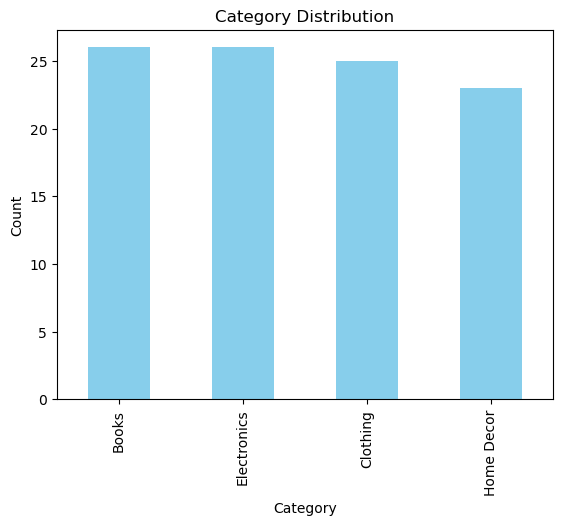

In [192]:
import matplotlib.pyplot as plt

# Plot the Category frequency
products['Category'].value_counts().plot(kind="bar", color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

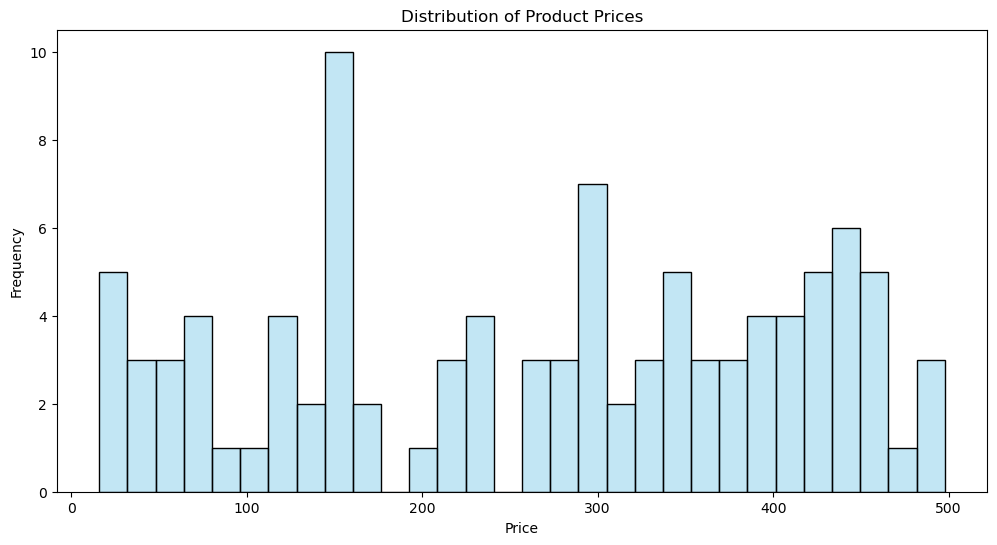

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(products['Price'], bins=30, alpha=0.5, color='skyblue', edgecolor='black')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

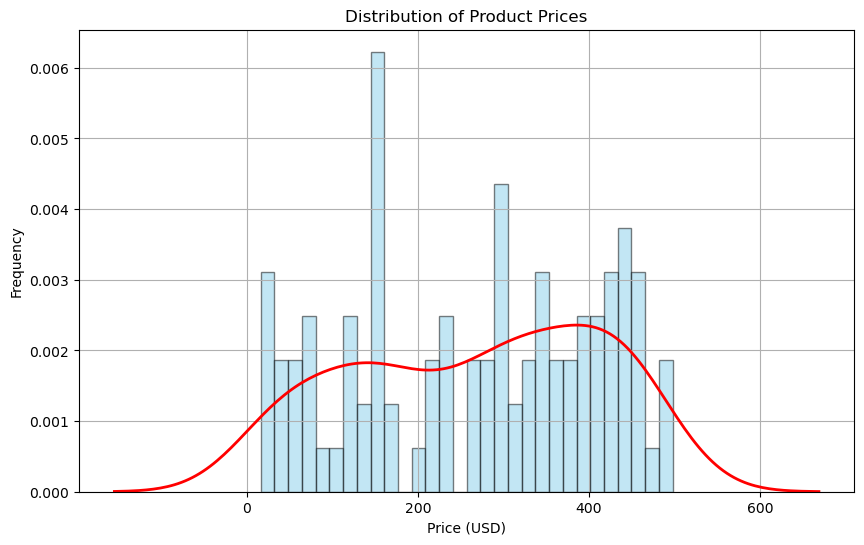

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame containing the Products.csv data
plt.figure(figsize=(10, 6))
products['Price'].hist(bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')
sns.kdeplot(products['Price'], color='red', linewidth=2)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


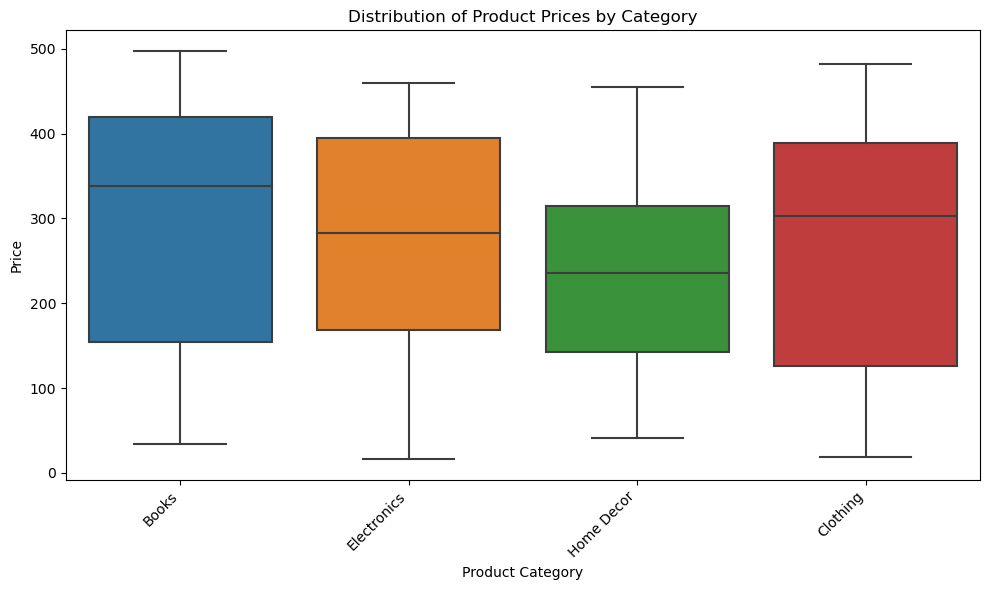

In [195]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=products)
plt.title("Distribution of Product Prices by Category")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

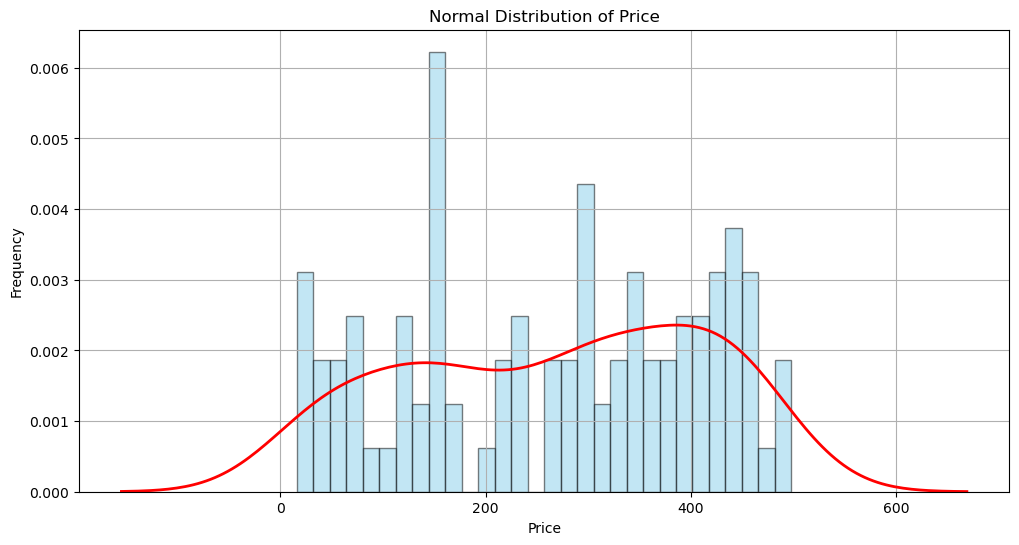

Mean: 267.06
Median: 292.5
Mode: 26
Skewness: -0.2078056053726471
Kurtosis: -1.2466147314564024
P-value (Shapiro-Wilk test): 0.00014231150271371007


In [196]:
plt.figure(figsize=(12, 6))

# Histogram of SignupDateConverted
products['Price'].hist(bins=30, density=True, alpha=0.5, color='skyblue', edgecolor='black')

# Kernel Density Estimate (KDE) plot
import seaborn as sns
sns.kdeplot(products['Price'], color='red', linewidth=2)

# Customize title and labels
plt.title('Normal Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Convert SignupDateConverted to numeric (e.g., timestamp)
price_numeric = products['Price'].astype('int64') # Convert datetime to Unix timestamp

# Calculate statistics
mean_price = price_numeric.mean()
median_price = price_numeric.median()
mode_price = price_numeric.mode()[0]
skewness_price = price_numeric.skew()
kurtosis_price = price_numeric.kurtosis()

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(price_numeric)
p_value = shapiro_test.pvalue

# Print the results
print(f"Mean: {mean_price}")
print(f"Median: {median_price}")
print(f"Mode: {mode_price}")
print(f"Skewness: {skewness_price}")
print(f"Kurtosis: {kurtosis_price}")
print(f"P-value (Shapiro-Wilk test): {p_value}")

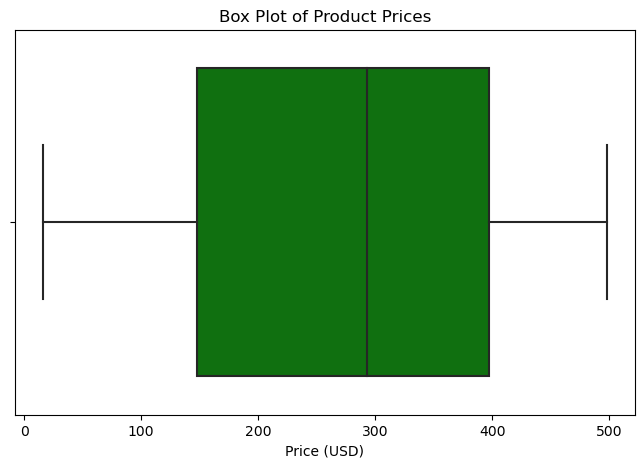

In [197]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=products['Price'], color='green')
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (USD)')
plt.show()


In [198]:
from scipy.stats import f_oneway

# Extract groups
books = products[products['Category'] == 'Books']['Price']
electronics = products[products['Category'] == 'Electronics']['Price']
clothing = products[products['Category'] == 'Clothing']['Price']
home_decor = products[products['Category'] == 'Home Decor']['Price']

# Print the extracted data for clarity
print("Books Prices:", books.tolist())
print("Electronics Prices:", electronics.tolist())
print("Clothing Prices:", clothing.tolist())
print("Home Decor Prices:", home_decor.tolist())

# Perform ANOVA
f_stat, p_value = f_oneway(books, electronics, clothing, home_decor)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

Books Prices: [169.3, 44.12, 420.15, 469.77, 436.89, 338.66, 277.86, 488.63, 153.19, 404.4, 416.4, 147.95, 57.3, 128.53, 157.62, 374.16, 33.59, 337.22, 447.23, 100.81, 497.76, 416.35, 440.7, 165.3, 319.34, 354.29]
Electronics Prices: [346.3, 146.85, 350.13, 159.6, 114.2, 158.93, 64.38, 229.06, 433.64, 196.4, 459.86, 430.59, 456.28, 379.44, 437.65, 16.08, 239.7, 300.68, 399.34, 26.99, 265.51, 455.72, 263.55, 220.91, 307.47, 299.93]
Clothing Prices: [429.31, 26.26, 330.05, 385.37, 396.34, 64.25, 217.05, 30.59, 372.55, 18.82, 481.78, 366.07, 354.81, 303.2, 155.65, 452.42, 427.61, 48.69, 127.36, 429.29, 303.5, 66.32, 290.17, 389.2, 126.34]
Home Decor Prices: [95.69, 121.32, 325.01, 261.2, 335.84, 137.54, 454.53, 284.62, 235.58, 147.22, 159.33, 65.16, 274.94, 156.96, 295.58, 41.18, 417.37, 55.99, 337.91, 222.95, 304.94, 447.34, 227.26]
F-statistic: 0.6775145833363106, p-value: 0.5679071811789924


In [199]:
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(products["Price"], products["Category"])
print(mc.tukeyhsd())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
      Books    Clothing -28.4923 0.8942 -133.8992  76.9146  False
      Books Electronics -16.8588 0.9745 -121.2272  87.5095  False
      Books  Home Decor -57.1923 0.5098 -164.9103  50.5256  False
   Clothing Electronics  11.6335 0.9916  -93.7734 117.0404  False
   Clothing  Home Decor    -28.7 0.9006 -137.4245  80.0245  False
Electronics  Home Decor -40.3335 0.7617 -148.0514  67.3845  False
-----------------------------------------------------------------


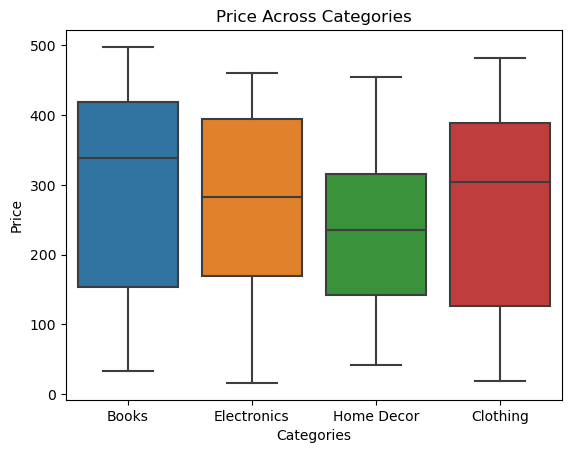

In [200]:
# Now plot the boxplot
sns.boxplot(data=products, x='Category', y='Price')
plt.title('Price Across Categories')
plt.xlabel('Categories')
plt.ylabel('Price')
plt.show()

TRANSACTIONS DATA

In [201]:
import pandas as pd
transactions = pd.read_csv("Transactions.csv")
transactions.head(4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68


In [202]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [203]:
ids = ["TransactionID", "CustomerID", "ProductID"]

for id in ids:
    #Count unique names
    print(f"Unique {id}:", transactions[id].nunique())
    # print("Unique Product Name:", transactions['ProductName'].unique())
    # Check duplicates (if any)
    print(f"Duplicate {id}:", transactions[id].duplicated().sum())
    # print("Duplicate Names:", transactions['ProductName'].duplicated())
    print("\n")

Unique TransactionID: 1000
Duplicate TransactionID: 0


Unique CustomerID: 199
Duplicate CustomerID: 801


Unique ProductID: 100
Duplicate ProductID: 900




In [204]:
import pandas as pd

# Load the dataset
transactions = pd.read_csv('Transactions.csv')

# Count how many times each product has been purchased
product_frequency = transactions['ProductID'].value_counts()

print("Frequency of Unique Products Purchased:")
print(product_frequency)


Frequency of Unique Products Purchased:
ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
        ..
P024     5
P014     4
P031     4
P044     4
P099     4
Name: count, Length: 100, dtype: int64


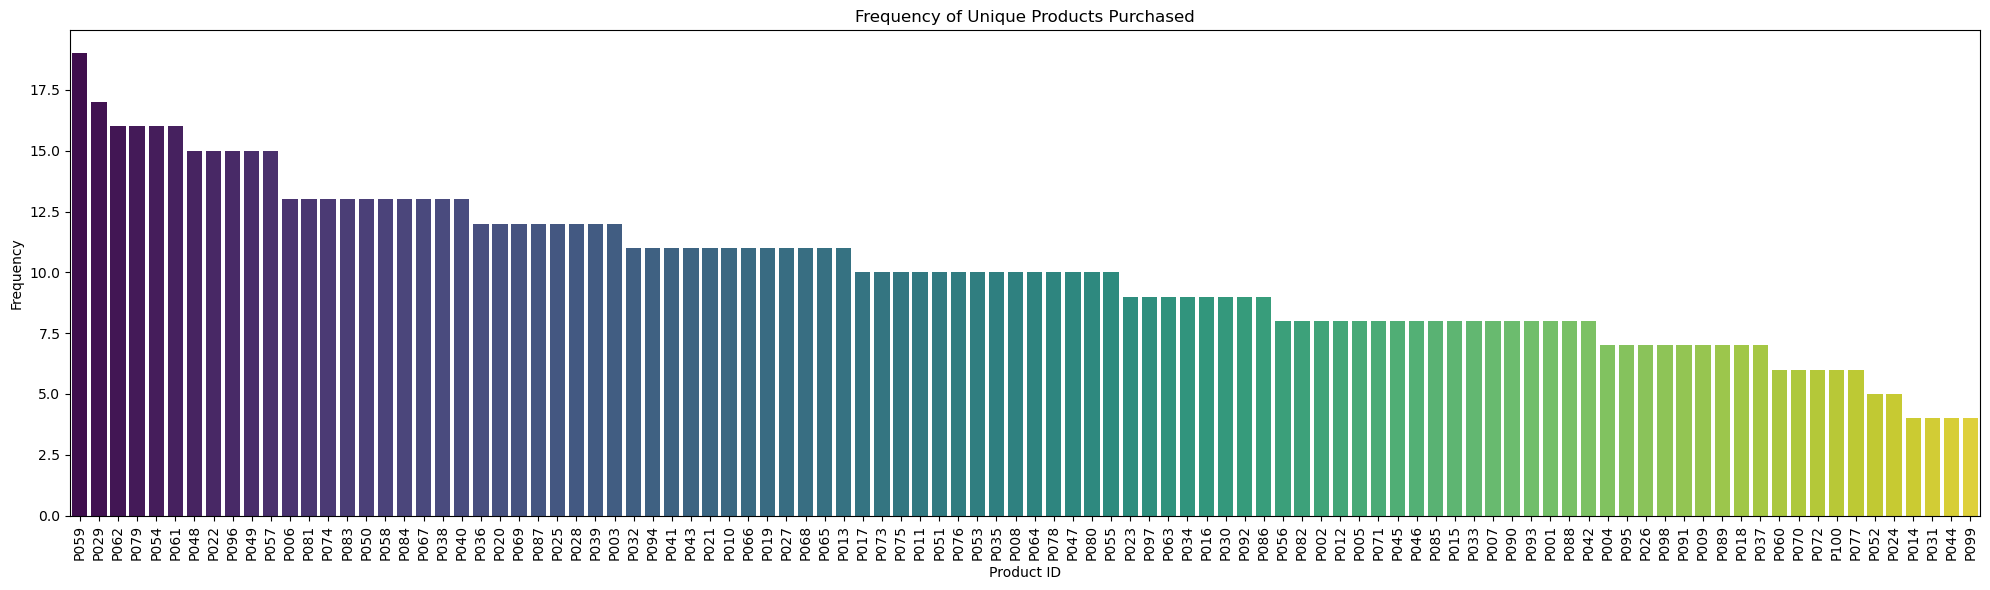

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the frequency of unique products purchased
plt.figure(figsize=(20, 6))
sns.barplot(x=product_frequency.index, y=product_frequency.values, palette='viridis')
plt.title('Frequency of Unique Products Purchased')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

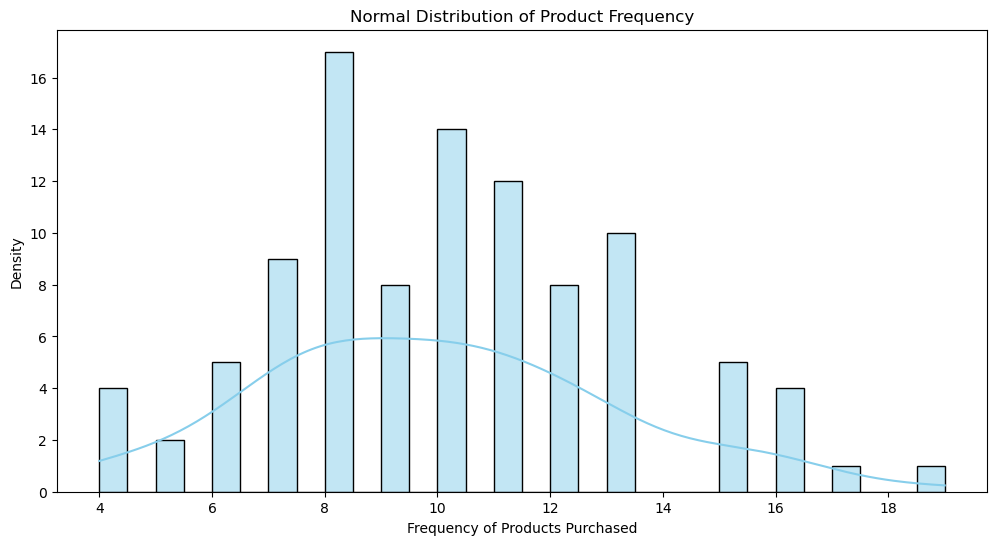

Mean Frequency: 10.0
Median Frequency: 10.0
Mode Frequency: 8
Skewness Frequency: 0.3683882723803989
Kurtosis Frequency: -0.0433313958368311


In [206]:
# Plotting the normal distribution of product frequency
plt.figure(figsize=(12, 6))

# Use sns.histplot for the histogram and KDE
sns.histplot(product_frequency, bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize title and labels
plt.title('Normal Distribution of Product Frequency')
plt.xlabel('Frequency of Products Purchased')
plt.ylabel('Density')

# Show the plot
plt.show()
# Calculate statistical measures for product frequency
mean_frequency = product_frequency.mean()
median_frequency = product_frequency.median()
mode_frequency = product_frequency.mode()[0]  # mode() returns a Series, take the first value
skewness_frequency = product_frequency.skew()
kurtosis_frequency = product_frequency.kurtosis()

# Print the results
print(f"Mean Frequency: {mean_frequency}")
print(f"Median Frequency: {median_frequency}")
print(f"Mode Frequency: {mode_frequency}")
print(f"Skewness Frequency: {skewness_frequency}")
print(f"Kurtosis Frequency: {kurtosis_frequency}")

In [207]:
# Convert the TransactionDate to datetime format
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Get the earliest and latest transaction dates
earliest_date = transactions['TransactionDate'].min()
latest_date = transactions['TransactionDate'].max()

print(f"Earliest Transaction Date: {earliest_date}")
# Quartiles (date distribution) in the new column
print("Transaction Date Quartiles:\n", transactions['TransactionDate'].quantile([0.25, 0.5, 0.75]))
print(f"Latest Transaction Date: {latest_date}")


Earliest Transaction Date: 2023-12-30 15:29:12
Transaction Date Quartiles:
 0.25   2024-03-25 22:05:34.500
0.50   2024-06-26 17:21:52.500
0.75   2024-09-19 14:19:57.000
Name: TransactionDate, dtype: datetime64[ns]
Latest Transaction Date: 2024-12-28 11:00:00


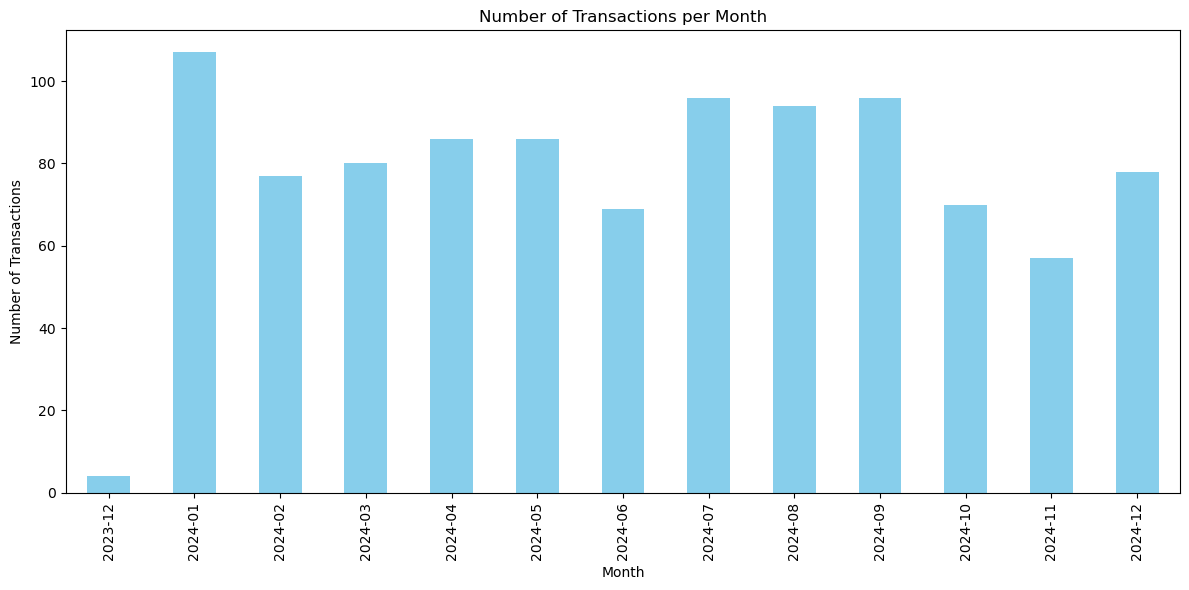

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualize the number of transactions over time
transaction_count_per_month = transactions.groupby(transactions['TransactionDate'].dt.to_period('M')).size()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
transaction_count_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


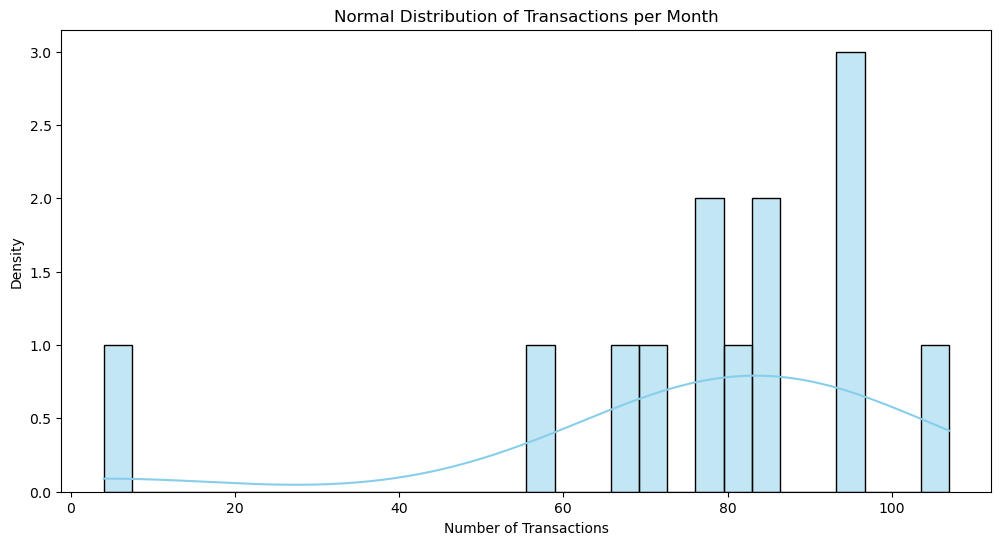

Mean Transactions: 76.92307692307692
Median Transactions: 80.0
Mode Transactions: 86
Skewness of Transactions: -2.0248005264108255
Kurtosis of Transactions: 5.437997352224485


In [209]:
# Plotting the normal distribution of transaction counts per month
plt.figure(figsize=(12, 6))

# Histogram of transaction counts per month
sns.histplot(transaction_count_per_month, bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize title and labels
plt.title('Normal Distribution of Transactions per Month')
plt.xlabel('Number of Transactions')
plt.ylabel('Density')

# Show the plot
plt.show()

# Calculate statistical measures for transaction counts per month
mean_transactions = transaction_count_per_month.mean()
median_transactions = transaction_count_per_month.median()
mode_transactions = transaction_count_per_month.mode()[0]  # mode() returns a Series, take the first value
skewness_transactions = transaction_count_per_month.skew()
kurtosis_transactions = transaction_count_per_month.kurtosis()

# Print the results
print(f"Mean Transactions: {mean_transactions}")
print(f"Median Transactions: {median_transactions}")
print(f"Mode Transactions: {mode_transactions}")
print(f"Skewness of Transactions: {skewness_transactions}")
print(f"Kurtosis of Transactions: {kurtosis_transactions}")

In [210]:
# Calculate total sales per product
transactions['SalesValue'] = transactions['Quantity'] * transactions['Price']
total_sales_per_product = transactions.groupby('ProductID')['SalesValue'].sum()

print("Total Sales per Product (Sorted):")
print(total_sales_per_product)

Total Sales per Product (Sorted):
ProductID
P001     3047.40
P002     8657.50
P003     1367.72
P004     1722.42
P005    10303.44
          ...   
P096    10453.98
P097     7983.50
P098     4798.88
P099     3897.19
P100     1895.10
Name: SalesValue, Length: 100, dtype: float64


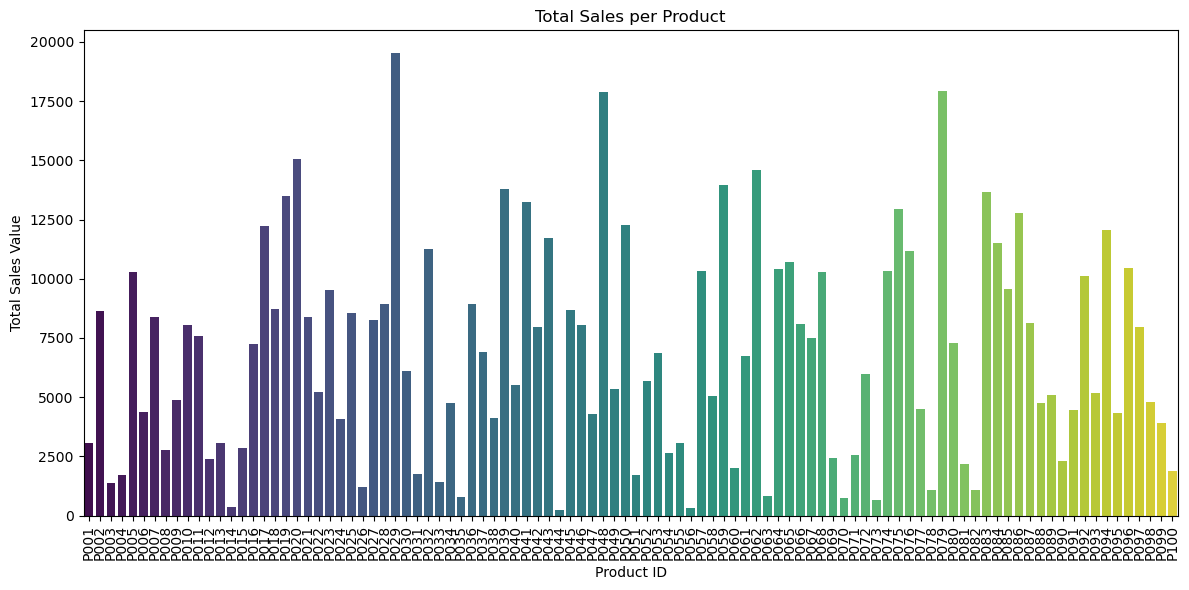

In [211]:
# Plotting total sales per product
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_per_product.index, y=total_sales_per_product.values, palette='viridis')
plt.title('Total Sales per Product')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

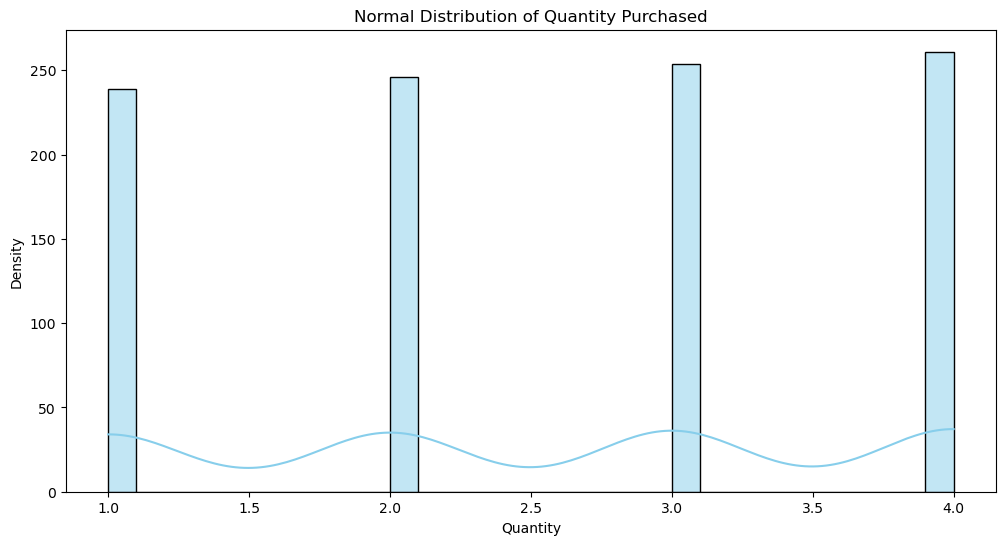

In [212]:
# Plotting the normal distribution of Quantity
plt.figure(figsize=(12, 6))

# Histogram of Quantity
sns.histplot(transactions['Quantity'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize title and labels
plt.title('Normal Distribution of Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Density')

# Show the plot
plt.show()

In [213]:
# Count unique customers per product
customer_frequency_per_product = transactions.groupby('ProductID')['CustomerID'].nunique()

print("Unique Customers per Product:")
print(customer_frequency_per_product)


Unique Customers per Product:
ProductID
P001     8
P002     8
P003    12
P004     7
P005     8
        ..
P096    15
P097     9
P098     7
P099     4
P100     5
Name: CustomerID, Length: 100, dtype: int64


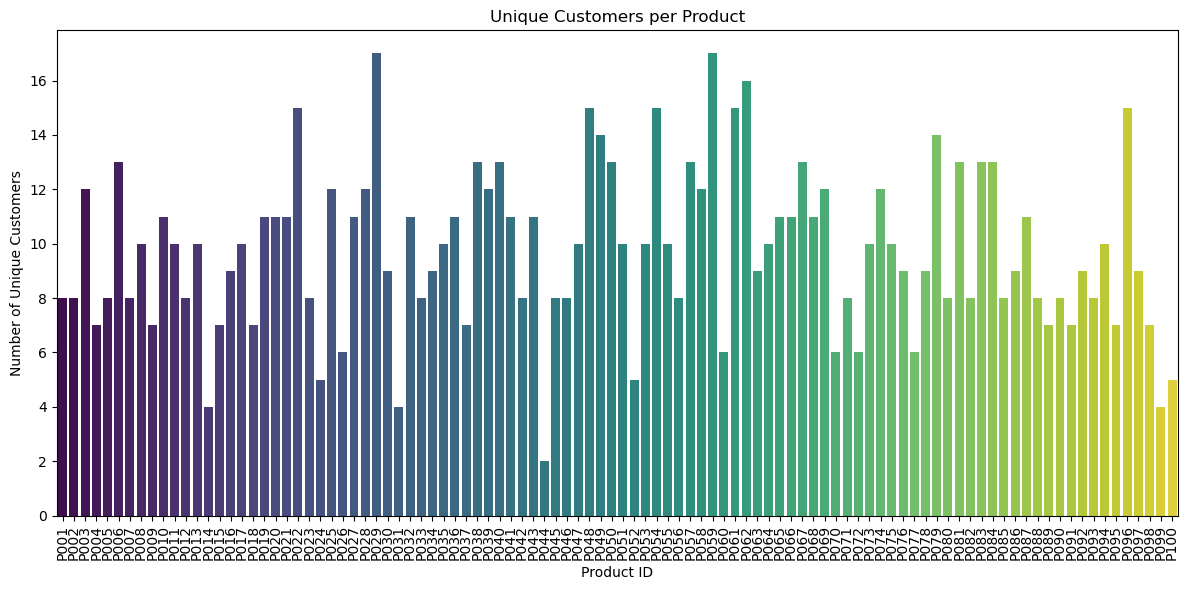

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting unique customers per product
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_frequency_per_product.index, y=customer_frequency_per_product.values, palette='viridis')
plt.title('Unique Customers per Product')
plt.xlabel('Product ID')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

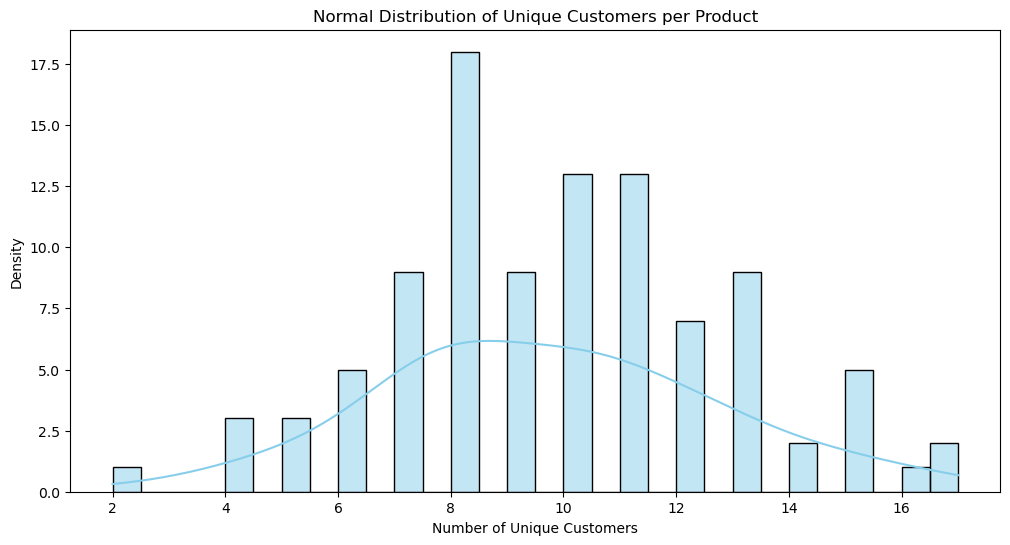

Mean Unique Customers: 9.74
Median Unique Customers: 10.0
Mode Unique Customers: 8
Skewness of Unique Customers: 0.15769662620869537
Kurtosis of Unique Customers: -0.09769913163738231


In [215]:
# Plotting the normal distribution of unique customers per product
plt.figure(figsize=(12, 6))

# Histogram of unique customers per product
sns.histplot(customer_frequency_per_product, bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize title and labels
plt.title('Normal Distribution of Unique Customers per Product')
plt.xlabel('Number of Unique Customers')
plt.ylabel('Density')

# Show the plot
plt.show()
# Calculate statistical measures for unique customers per product
mean_customers = customer_frequency_per_product.mean()
median_customers = customer_frequency_per_product.median()
mode_customers = customer_frequency_per_product.mode()[0]
skewness_customers = customer_frequency_per_product.skew()
kurtosis_customers = customer_frequency_per_product.kurtosis()

# Print the results
print(f"Mean Unique Customers: {mean_customers}")
print(f"Median Unique Customers: {median_customers}")
print(f"Mode Unique Customers: {mode_customers}")
print(f"Skewness of Unique Customers: {skewness_customers}")
print(f"Kurtosis of Unique Customers: {kurtosis_customers}")


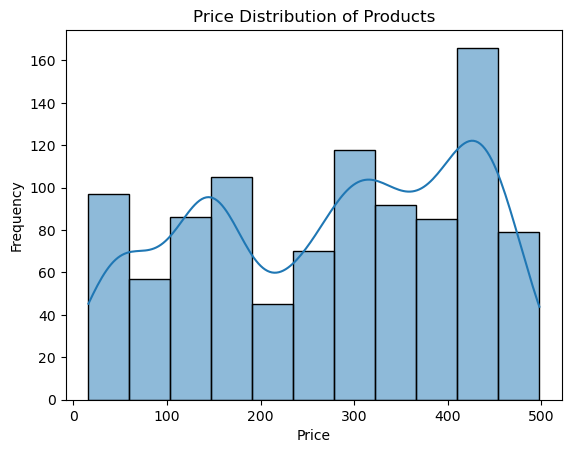

Mean Price: 272.55407
Median Price: 299.93
Mode Price: 299.93
Skewness of Price: -0.22703872386268117
Kurtosis of Price: -1.2398113775303874


In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of product prices
sns.histplot(transactions['Price'], kde=True)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# ... existing code ...
# Calculate statistical measures for product prices
mean_price = transactions['Price'].mean()
median_price = transactions['Price'].median()
mode_price = transactions['Price'].median()
skewness_price = transactions['Price'].skew()
kurtosis_price = transactions['Price'].kurtosis()

# Print the results
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Skewness of Price: {skewness_price}")
print(f"Kurtosis of Price: {kurtosis_price}")

In [217]:
# Analyze the variation in the quantity of products purchased
quantity_variation = transactions['Quantity'].describe()

print("Transaction Size Variation (Quantity):")
print(quantity_variation)


Transaction Size Variation (Quantity):
count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64


Recurrent Product Purchases:
ProductID
P001     8
P002     8
P003    12
P004     7
P005     8
        ..
P096    15
P097     9
P098     7
P099     4
P100     6
Name: TransactionID, Length: 100, dtype: int64
Recurrent Product Purchases:
the maximum recurrent product purchase : 19
the minimum recurrent product purchase : 4

Statistical Measures of Recurrent Product Purchases:
Mean: 10.00
Median: 10.00
Mode: 8.00


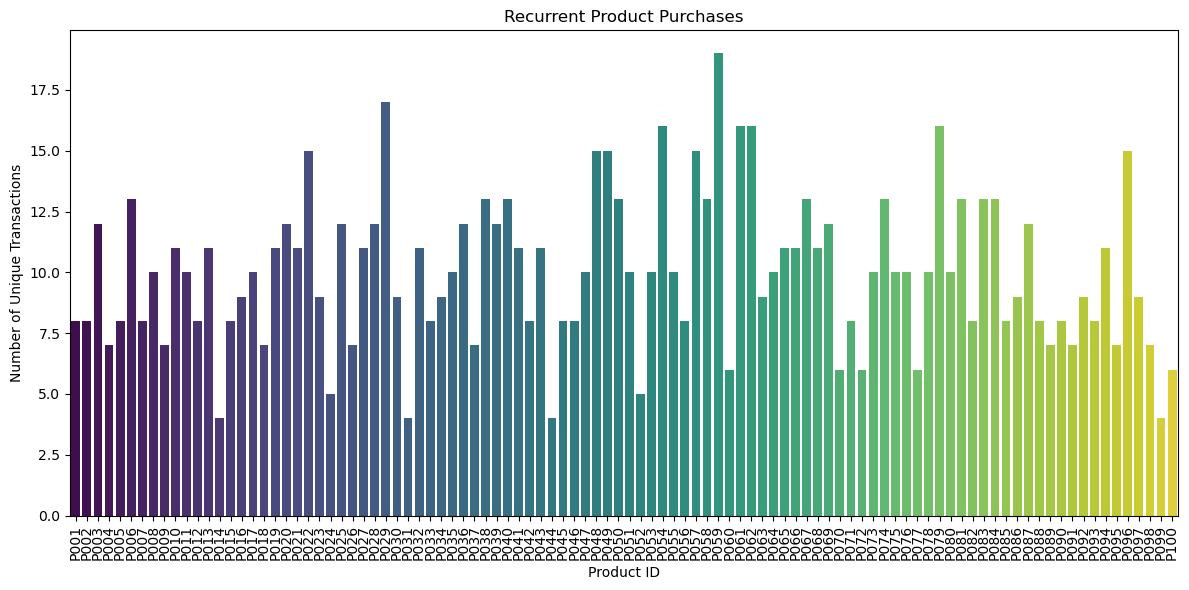

In [218]:
# Count how many times each product has been purchased in multiple transactions
recurrent_product_purchases = transactions.groupby('ProductID')['TransactionID'].nunique()

print("Recurrent Product Purchases:")
print(recurrent_product_purchases)

import matplotlib.pyplot as plt
import seaborn as sns

# Count how many times each product has been purchased in multiple transactions
recurrent_product_purchases = transactions.groupby('ProductID')['TransactionID'].nunique()

# Print the results
print("Recurrent Product Purchases:")
print(f"the maximum recurrent product purchase : {recurrent_product_purchases.max()}")
print(f"the minimum recurrent product purchase : {recurrent_product_purchases.min()}")

mean_recurrent = recurrent_product_purchases.mean()
median_recurrent = recurrent_product_purchases.median()
mode_recurrent = recurrent_product_purchases.mode()[0]  # mode() returns a Series, take the first value

# Print statistical measures
print(f"\nStatistical Measures of Recurrent Product Purchases:")
print(f"Mean: {mean_recurrent:.2f}")
print(f"Median: {median_recurrent:.2f}")
print(f"Mode: {mode_recurrent:.2f}")

# Plotting the recurrent product purchases
plt.figure(figsize=(12, 6))
sns.barplot(x=recurrent_product_purchases.index, y=recurrent_product_purchases.values, palette='viridis')
plt.title('Recurrent Product Purchases')
plt.xlabel('Product ID')
plt.ylabel('Number of Unique Transactions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [219]:
# Identify products with low transaction frequency
threshold = 7
low_purchase_products = product_frequency[product_frequency <= threshold]  # Modify the threshold as needed

# Print the count of products with sparse purchases
print(f"Count of Products with Sparse Purchases (Purchased {threshold} or fewer times): {len(low_purchase_products)}")

Count of Products with Sparse Purchases (Purchased 7 or fewer times): 20


In [220]:
# Extract month and year from TransactionDate
transactions['Month'] = transactions['TransactionDate'].dt.month
transactions['Year'] = transactions['TransactionDate'].dt.year

# Get the number of transactions per month
transaction_count_per_month = transactions.groupby(['Year', 'Month'])['TransactionID'].count()

print("Transaction Timing Patterns (Monthly Transactions):")
print(transaction_count_per_month)


Transaction Timing Patterns (Monthly Transactions):
Year  Month
2023  12         4
2024  1        107
      2         77
      3         80
      4         86
      5         86
      6         69
      7         96
      8         94
      9         96
      10        70
      11        57
      12        78
Name: TransactionID, dtype: int64


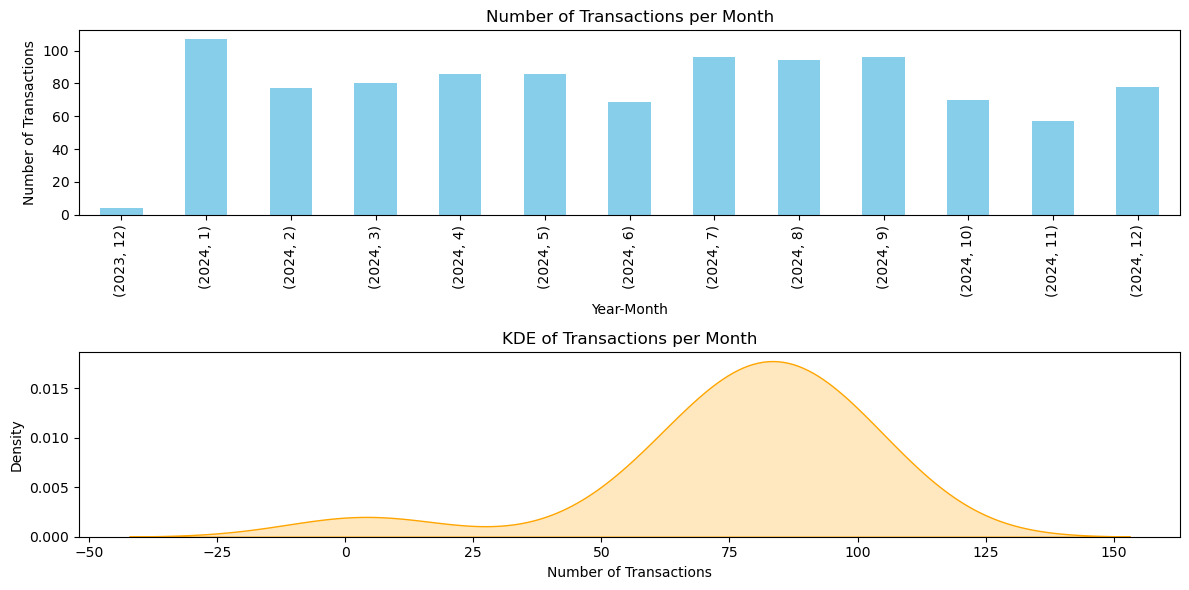

Mean Transactions: 76.92307692307692
Median Transactions: 80.0
Mode Transactions: 86
Skewness of Transactions: -2.0248005264108255
Kurtosis of Transactions: 5.437997352224485


In [221]:
# Plotting the number of transactions per month
plt.figure(figsize=(12, 6))

# Bar plot for the number of transactions
plt.subplot(2, 1, 1)  # Create a subplot for the bar plot
transaction_count_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)

# KDE plot for the number of transactions
plt.subplot(2, 1, 2)  # Create a subplot for the KDE plot
sns.kdeplot(transaction_count_per_month, color='orange', fill=True)
plt.title('KDE of Transactions per Month')
plt.xlabel('Number of Transactions')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Calculate statistical measures for transaction counts per month
mean_transactions = transaction_count_per_month.mean()
median_transactions = transaction_count_per_month.median()
mode_transactions = transaction_count_per_month.mode()[0]  # mode() returns a Series, take the first value
skewness_transactions = transaction_count_per_month.skew()
kurtosis_transactions = transaction_count_per_month.kurtosis()

# Print the results
print(f"Mean Transactions: {mean_transactions}")
print(f"Median Transactions: {median_transactions}")
print(f"Mode Transactions: {mode_transactions}")
print(f"Skewness of Transactions: {skewness_transactions}")
print(f"Kurtosis of Transactions: {kurtosis_transactions}")

In [222]:
# Check if the price is consistent for each product across different customers
print("Analyzing price consistency for each product across different customers...\n")

price_consistency = transactions.groupby('ProductID')['Price'].nunique().sort_values(ascending=False)

# Print only the unique values of price consistency
unique_price_counts = price_consistency.unique()
print("Unique counts of prices across products:")
print(unique_price_counts)

Analyzing price consistency for each product across different customers...

Unique counts of prices across products:
[1]


COMBINING ALL 3 DATASETS:

In [223]:
combined = pd.merge(transactions, customers, on="CustomerID", how="left")

# Merge the result with products
combined = pd.merge(combined, products, on="ProductID", how="left")

# Save the combined dataset
combined.to_csv("combined_dataset.csv", index=False)
print("Combined dataset created!")

Combined dataset created!


In [224]:
df_c = pd.read_csv("combined_dataset.csv")
df_c.head(4)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,SalesValue,Month,Year,CustomerName,Region,SignupDate,SignupDateConverted,Month_Year,SignupDateNumeric,SignupQuarter,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,300.68,8,2024,Andrea Jenkins,Europe,2022-12-03,2022-12-03,2022-12,1670025600,2022Q4,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,300.68,5,2024,Brittany Harvey,Asia,2024-09-04,2024-09-04,2024-09,1725408000,2024Q3,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,300.68,4,2024,Kathryn Stevens,Europe,2024-04-04,2024-04-04,2024-04,1712188800,2024Q2,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,601.36,3,2024,Travis Campbell,South America,2024-04-11,2024-04-11,2024-04,1712793600,2024Q2,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [225]:
mean_total_value = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].mean()
print("\nMean TotalValue by Region:")
print(mean_total_value)


Mean TotalValue by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64



Mean TotalValue by Region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


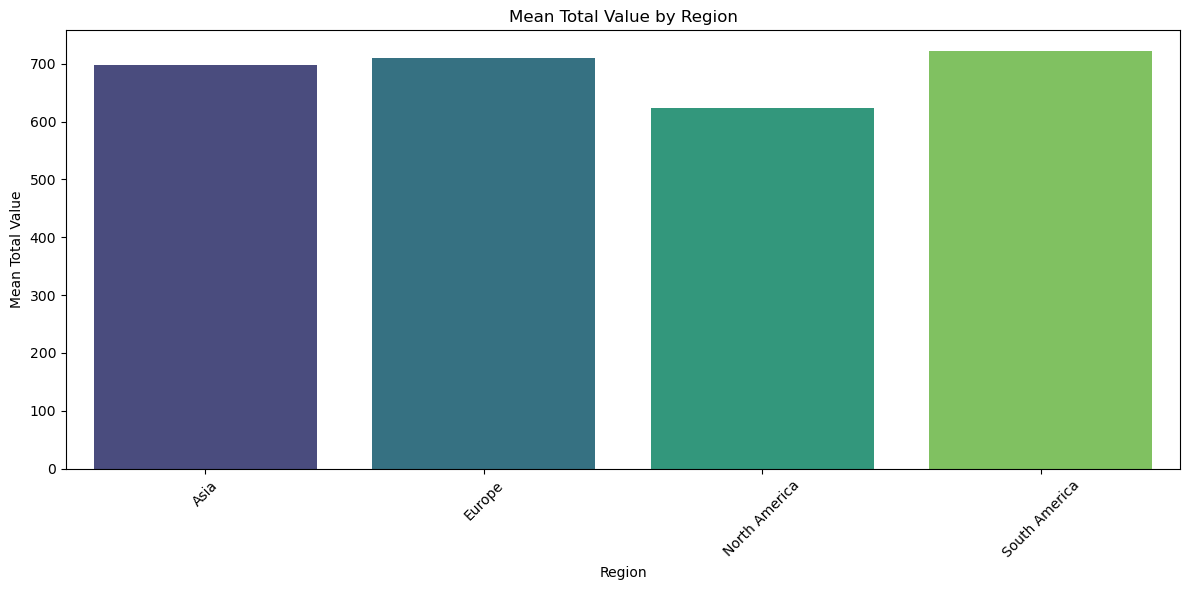

In [226]:
mean_total_value = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].mean()
print("\nMean TotalValue by Region:")
print(mean_total_value)

# Plotting the mean total value by region
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=mean_total_value.index, y=mean_total_value.values, palette='viridis')
plt.title('Mean Total Value by Region')
plt.xlabel('Region')
plt.ylabel('Mean Total Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [227]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionID        1000 non-null   object 
 1   CustomerID           1000 non-null   object 
 2   ProductID            1000 non-null   object 
 3   TransactionDate      1000 non-null   object 
 4   Quantity             1000 non-null   int64  
 5   TotalValue           1000 non-null   float64
 6   Price_x              1000 non-null   float64
 7   SalesValue           1000 non-null   float64
 8   Month                1000 non-null   int64  
 9   Year                 1000 non-null   int64  
 10  CustomerName         1000 non-null   object 
 11  Region               1000 non-null   object 
 12  SignupDate           1000 non-null   object 
 13  SignupDateConverted  1000 non-null   object 
 14  Month_Year           1000 non-null   object 
 15  SignupDateNumeric    1000 non-null   in

In [228]:
df_c.Category.unique()

array(['Electronics', 'Clothing', 'Books', 'Home Decor'], dtype=object)

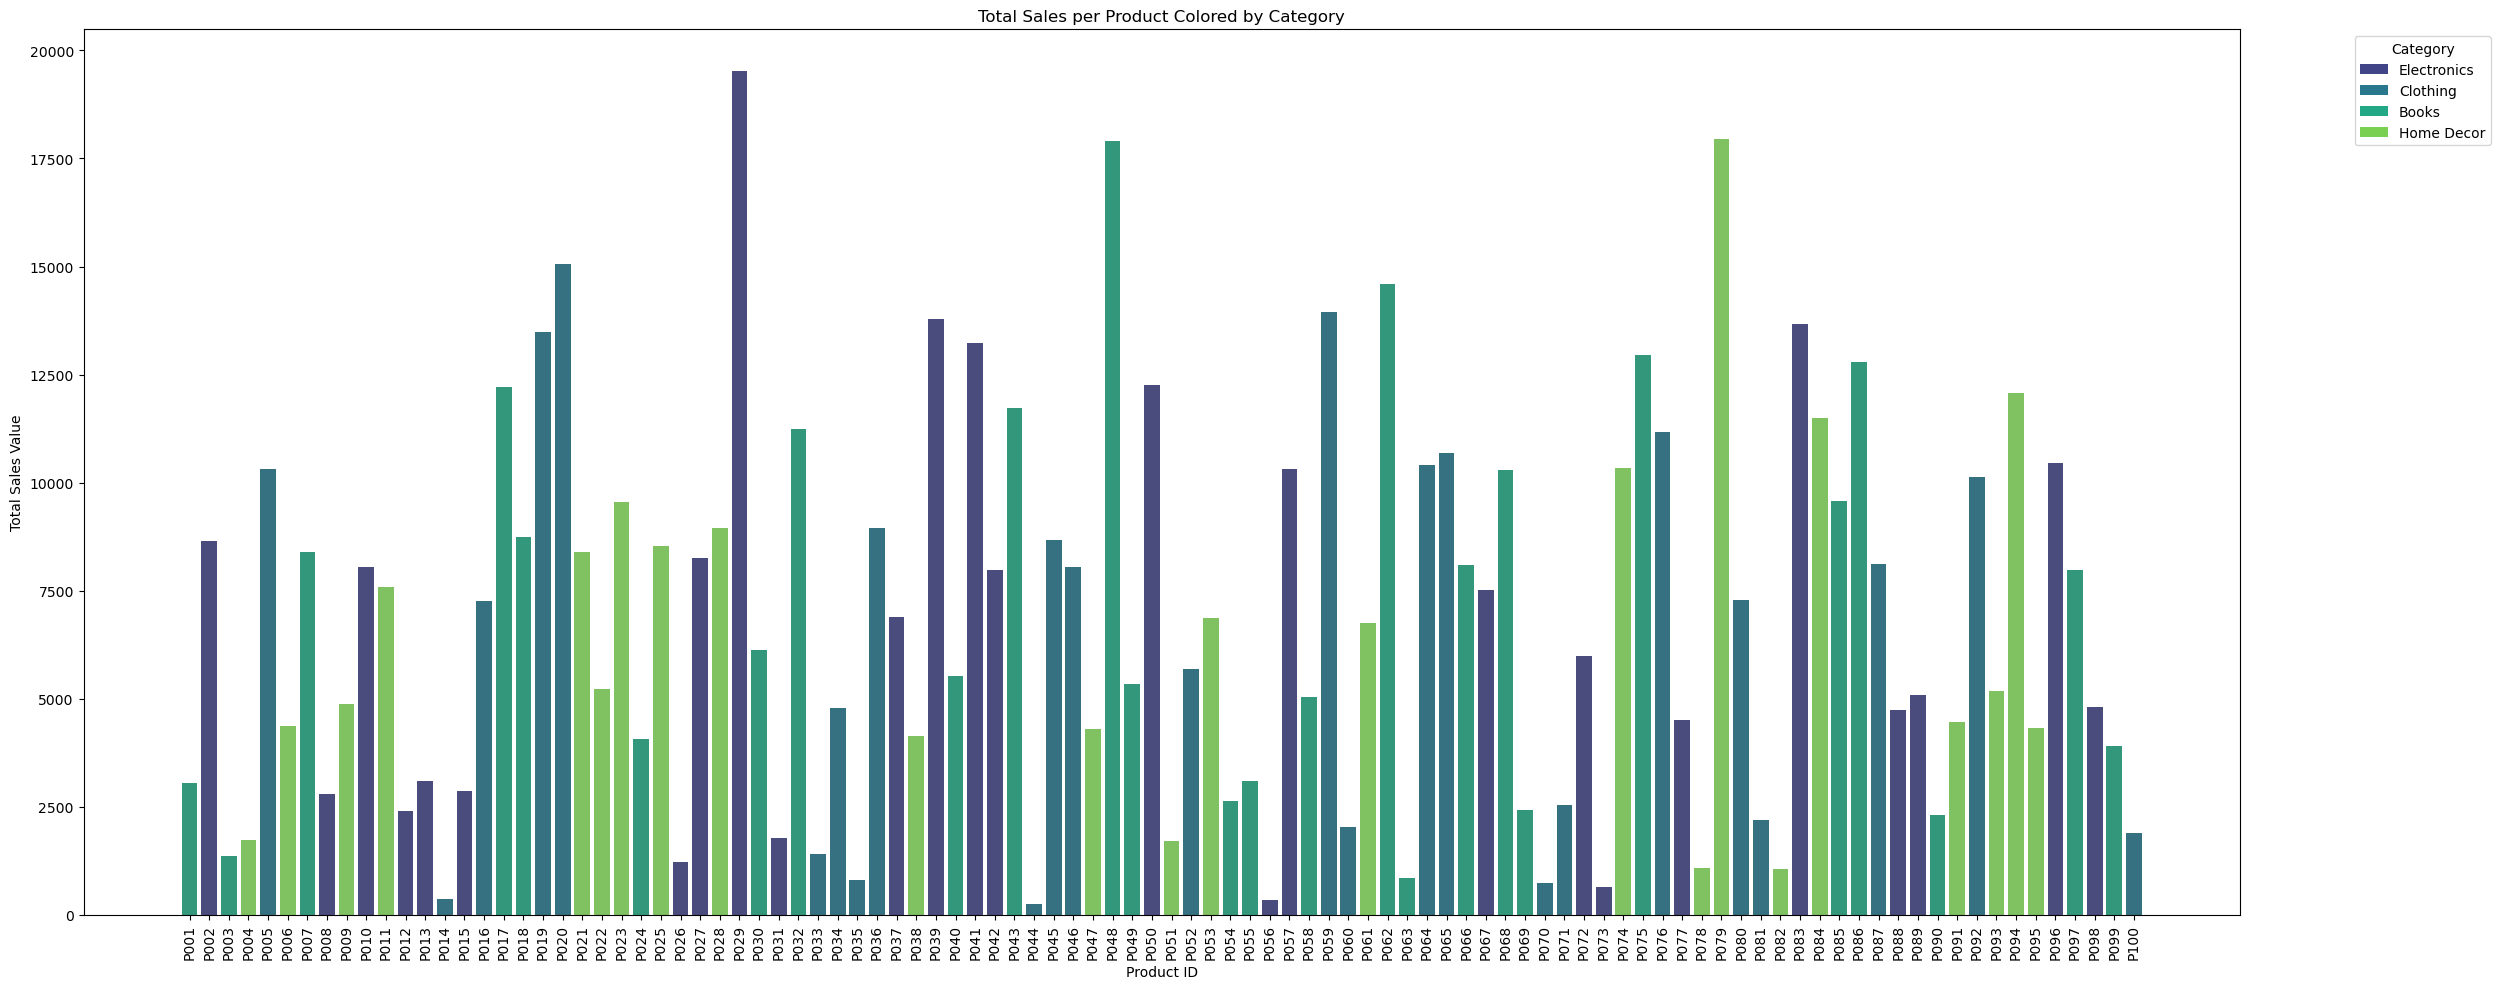

In [229]:
# Plotting total sales per product with category colors
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for total sales and categories from df_c
total_sales_df = pd.DataFrame({
    'ProductID': total_sales_per_product.index,
    'TotalSales': total_sales_per_product.values,
    'Category': df_c.groupby('ProductID')['Category'].first()  # Using df_c for category information
})

# Set the color palette based on categories
categories = ['Electronics', 'Clothing', 'Books', 'Home Decor']  # Define your categories
palette = sns.color_palette("viridis", n_colors=len(categories))  # Create a palette for the categories

# Map categories to colors
category_to_color = dict(zip(categories, palette))
total_sales_df['Color'] = total_sales_df['Category'].map(category_to_color)

plt.figure(figsize=(25, 10))

# Plot the bar chart with category colors
sns.barplot(
    x='ProductID', 
    y='TotalSales', 
    data=total_sales_df, 
    palette=total_sales_df['Category'].map(category_to_color)
)

# Add a title and axis labels
plt.title('Total Sales per Product Colored by Category')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=90)

# Add a legend for the categories
for category, color in category_to_color.items():
    plt.bar(0, 0, color=color, label=category)  # Dummy bars for legend
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.tight_layout()
plt.show()


In [230]:
# Print the number of unique products and categories
print(f"Number of unique products: {total_sales_df['ProductID'].nunique()}")
print(f"Number of unique categories: {total_sales_df['Category'].nunique()}")

# Print total sales for each category
print("\nTotal Sales by Category:")
print(total_sales_df.groupby('Category')['TotalSales'].sum().sort_values(ascending=False))

# Print the top 5 products with the highest sales
top_products = total_sales_df.nlargest(5, 'TotalSales')
print("\nTop 5 Products by Total Sales:")
print(top_products[['ProductID', 'TotalSales', 'Category']])

# Print the category distribution
print("\nCategory Distribution (Number of Products in Each Category):")
print(total_sales_df['Category'].value_counts())

# Check for any products without category information
missing_category_count = total_sales_df['Category'].isnull().sum()
if missing_category_count > 0:
    print(f"\nWarning: {missing_category_count} products have missing category information.")
else:
    print("\nAll products have category information.")

# Continue with the plotting code


Number of unique products: 100
Number of unique categories: 4

Total Sales by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalSales, dtype: float64

Top 5 Products by Total Sales:
          ProductID  TotalSales     Category
ProductID                                   
P029           P029    19513.80  Electronics
P079           P079    17946.91   Home Decor
P048           P048    17905.20        Books
P020           P020    15060.92     Clothing
P062           P062    14592.24        Books

Category Distribution (Number of Products in Each Category):
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

All products have category information.


<Figure size 1200x600 with 0 Axes>

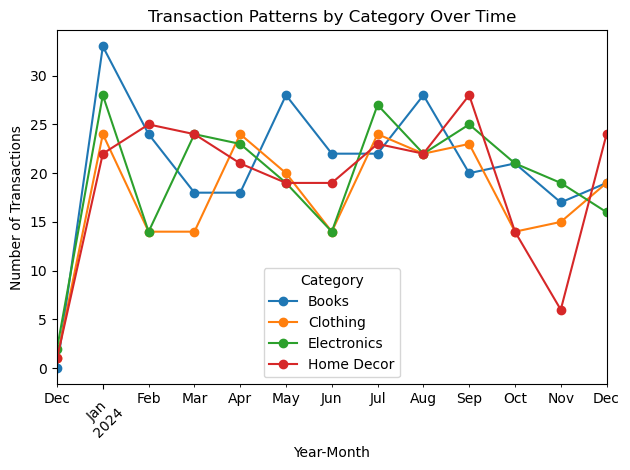

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_c is your DataFrame containing the necessary data
# Ensure TransactionDate is in datetime format
df_c['TransactionDate'] = pd.to_datetime(df_c['TransactionDate'])

# Extract month and year from TransactionDate
df_c['YearMonth'] = df_c['TransactionDate'].dt.to_period('M')

# Group by Category and YearMonth, then count transactions
transaction_pattern = df_c.groupby(['Category', 'YearMonth']).size().reset_index(name='TransactionCount')

# Pivot the data for better visualization
transaction_pattern_pivot = transaction_pattern.pivot(index='YearMonth', columns='Category', values='TransactionCount').fillna(0)

# Plotting the transaction patterns
plt.figure(figsize=(12, 6))
transaction_pattern_pivot.plot(kind='line', marker='o')
plt.title('Transaction Patterns by Category Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [232]:
df_c.Region.unique()

array(['Europe', 'Asia', 'South America', 'North America'], dtype=object)

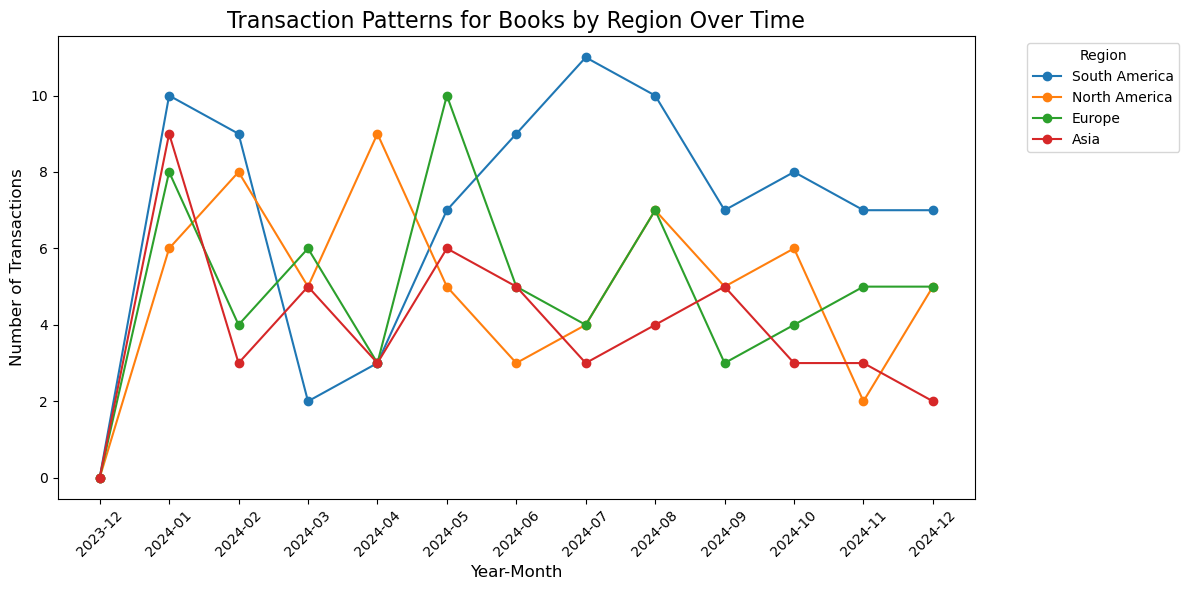

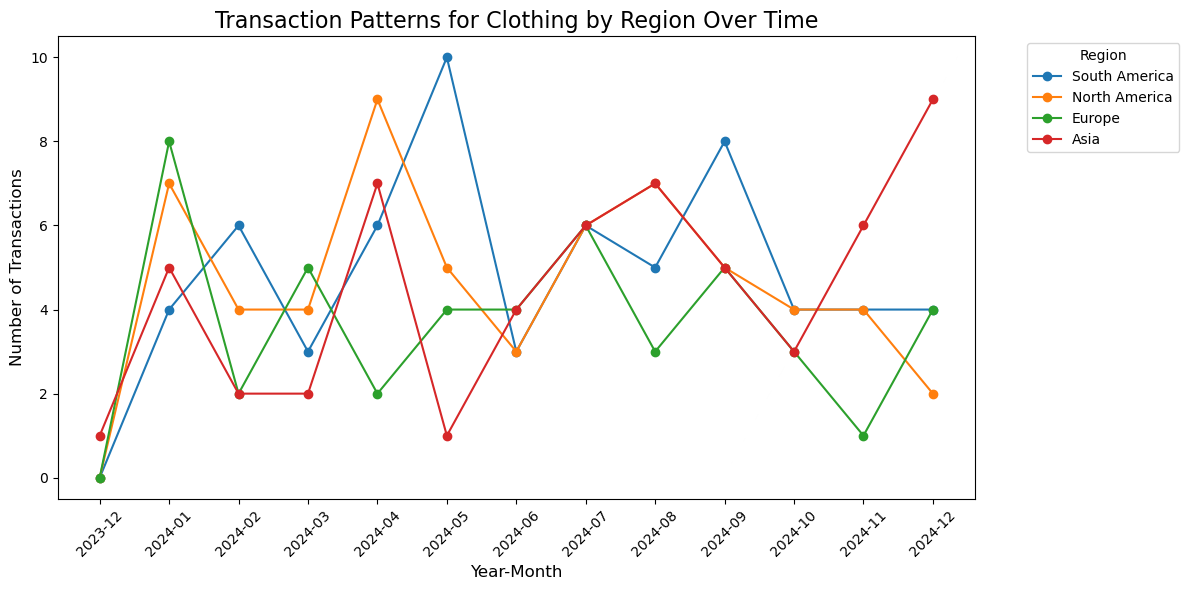

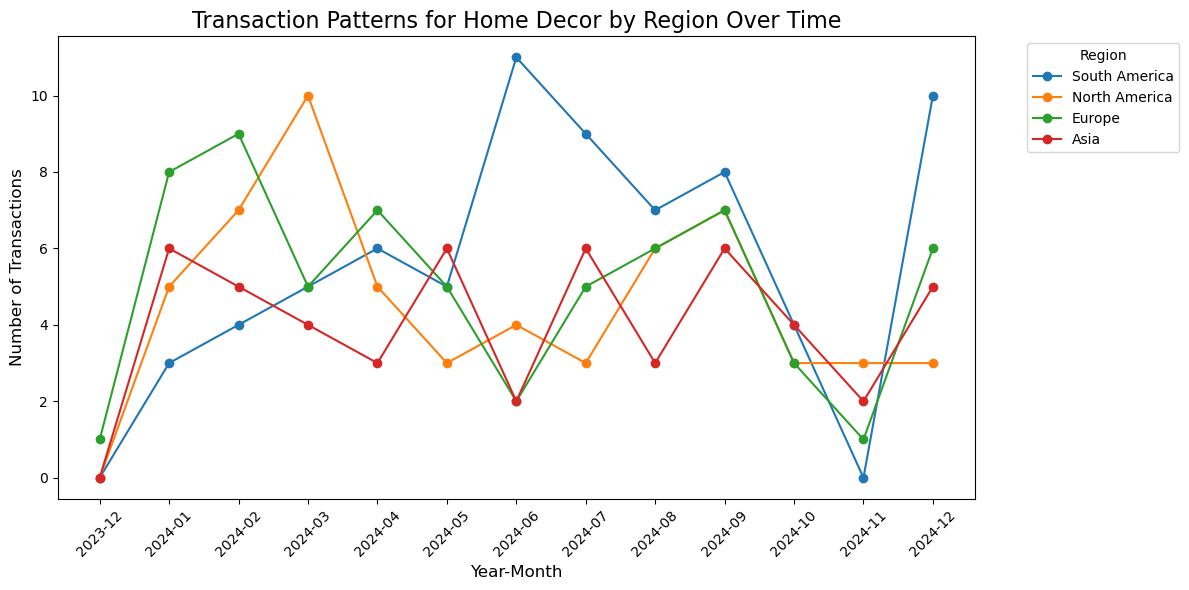

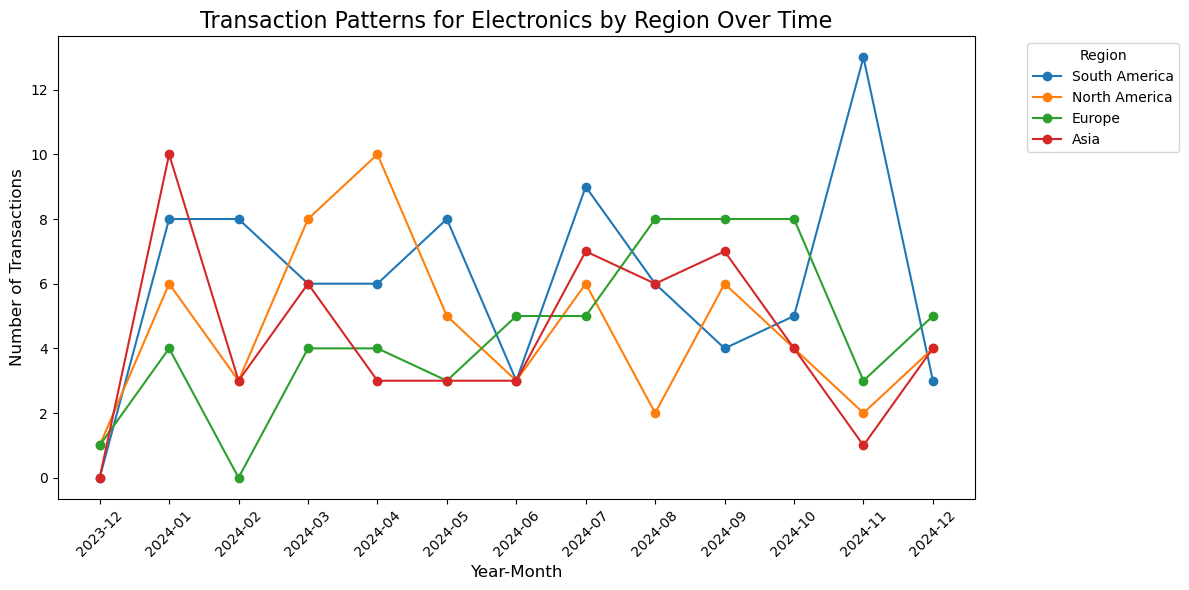

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure TransactionDate is in datetime format
df_c['TransactionDate'] = pd.to_datetime(df_c['TransactionDate'])

# Extract month and year from TransactionDate
df_c['YearMonth'] = df_c['TransactionDate'].dt.to_period('M')

# Group by Category, Region, and YearMonth, then count transactions
transaction_pattern = df_c.groupby(['Category', 'Region', 'YearMonth']).size().reset_index(name='TransactionCount')

# Pivot the data for better visualization
transaction_pattern_pivot = transaction_pattern.pivot_table(
    index='YearMonth', 
    columns=['Category', 'Region'], 
    values='TransactionCount', 
    fill_value=0
)

# Define categories and regions
categories = ['Books', 'Clothing', 'Home Decor', 'Electronics']
regions = ['South America', 'North America', 'Europe', 'Asia']

# Plot each category in a separate graph
for category in categories:
    plt.figure(figsize=(12, 6))
    for region in regions:
        if (category, region) in transaction_pattern_pivot.columns:  # Ensure data exists for this category-region pair
            plt.plot(
                transaction_pattern_pivot.index.astype(str), 
                transaction_pattern_pivot[category, region], 
                marker='o', 
                label=f'{region}'
            )
    
    # Add titles and labels
    plt.title(f'Transaction Patterns for {category} by Region Over Time', fontsize=16)
    plt.xlabel('Year-Month', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


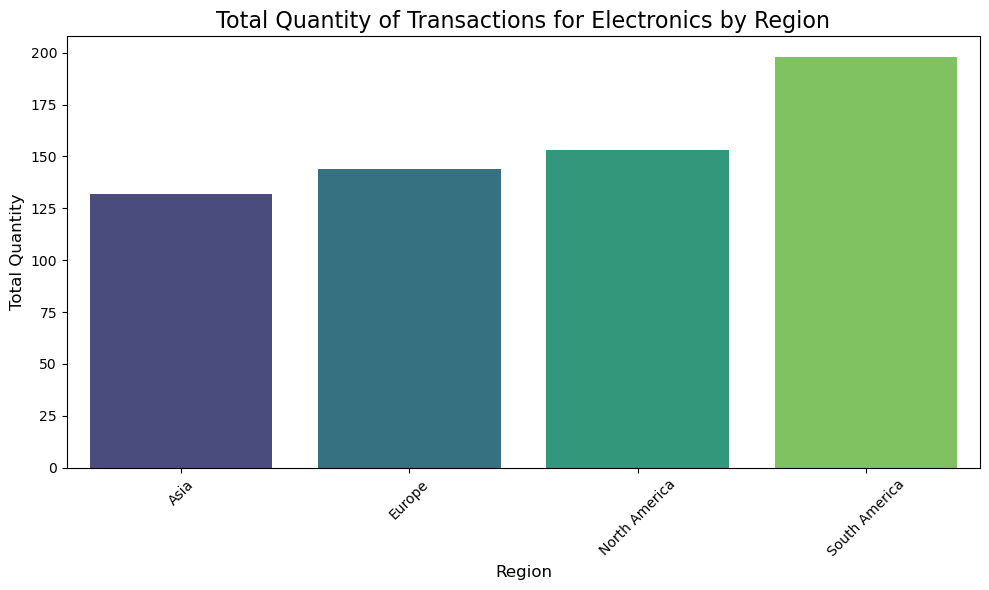

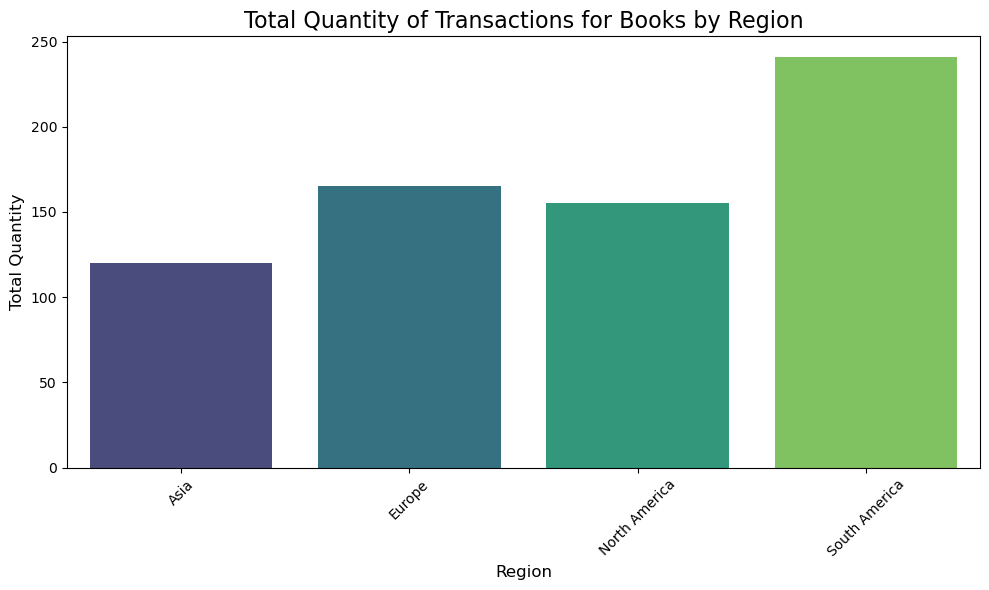

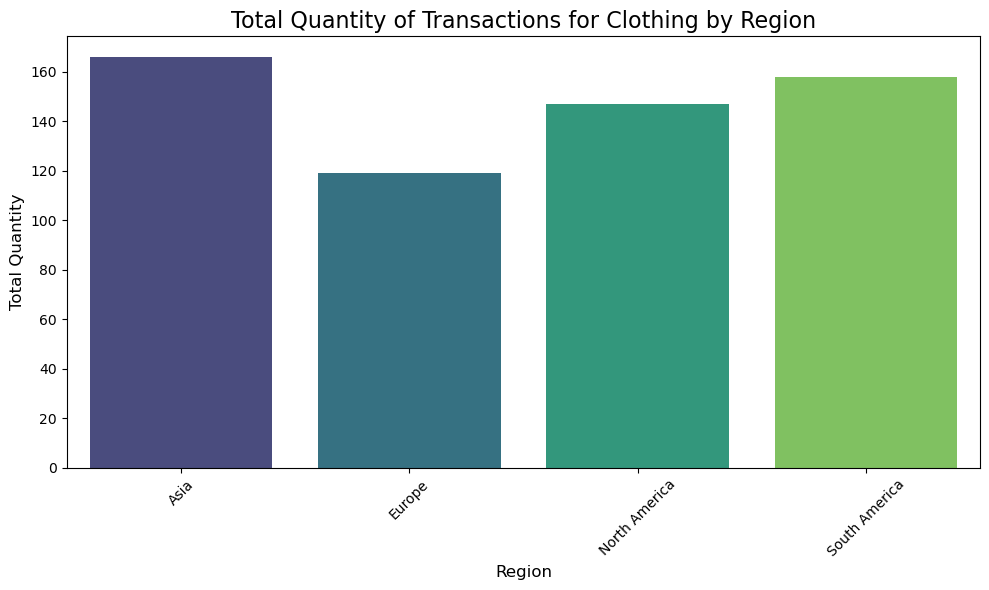

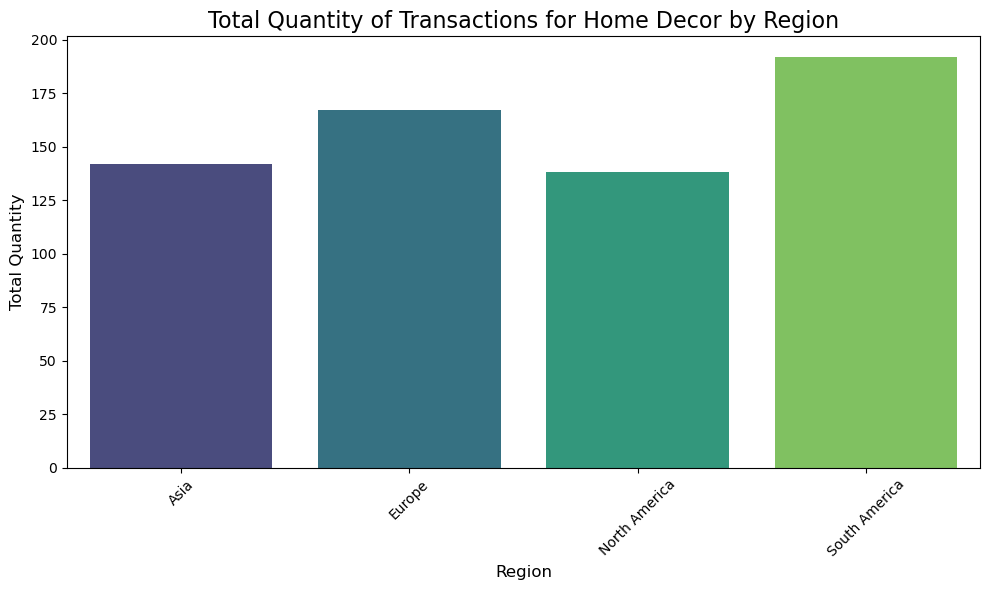

In [234]:
categories = ['Electronics', 'Books', 'Clothing', 'Home Decor']

# Loop through each category to create a separate graph
for selected_category in categories:
    # Filter the DataFrame for the selected category
    filtered_df = df_c[df_c['Category'] == selected_category]
    
    # Group by Region and sum the Quantity
    quantity_by_region = filtered_df.groupby('Region')['Quantity'].sum().reset_index()
    
    # Plotting the quantities of transactions by region for the selected category
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Region', y='Quantity', data=quantity_by_region, palette='viridis')
    plt.title(f'Total Quantity of Transactions for {selected_category} by Region', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Total Quantity', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Figure size 1400x800 with 0 Axes>

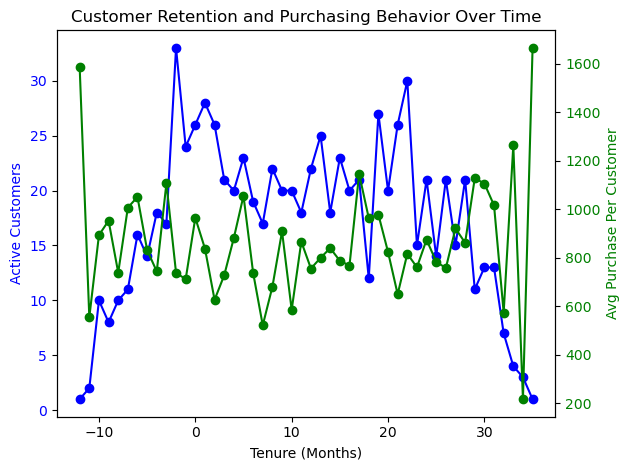

In [235]:
df_c['SignupDate'] = pd.to_datetime(df_c['SignupDate'])

# Calculate the Customer Tenure in months
df_c['TenureMonths'] = ((df_c['TransactionDate'] - df_c['SignupDate']).dt.days // 30)

# Group customers by tenure and calculate purchasing behavior
customer_retention = (
    df_c.groupby('TenureMonths')
    .agg({
        'CustomerID': 'nunique',      # Unique active customers
        'TransactionID': 'count',    # Total transactions
        'TotalValue': 'sum'          # Total value of purchases
    })
    .reset_index()
    .rename(columns={'CustomerID': 'ActiveCustomers'})
)

# Calculate average purchase value per active customer
customer_retention['AvgPurchasePerCustomer'] = (
    customer_retention['TotalValue'] / customer_retention['ActiveCustomers']
)

# Plotting the retention analysis
plt.figure(figsize=(14, 8))

# Create a dual-axis line chart
fig, ax1 = plt.subplots()

# Plot Active Customers
ax1.set_xlabel('Tenure (Months)')
ax1.set_ylabel('Active Customers', color='blue')
ax1.plot(customer_retention['TenureMonths'], customer_retention['ActiveCustomers'], color='blue', marker='o', label='Active Customers')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Avg Purchase Per Customer
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Purchase Per Customer', color='green')
ax2.plot(customer_retention['TenureMonths'], customer_retention['AvgPurchasePerCustomer'], color='green', marker='o', label='Avg Purchase Per Customer')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Customer Retention and Purchasing Behavior Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<Figure size 1400x800 with 0 Axes>

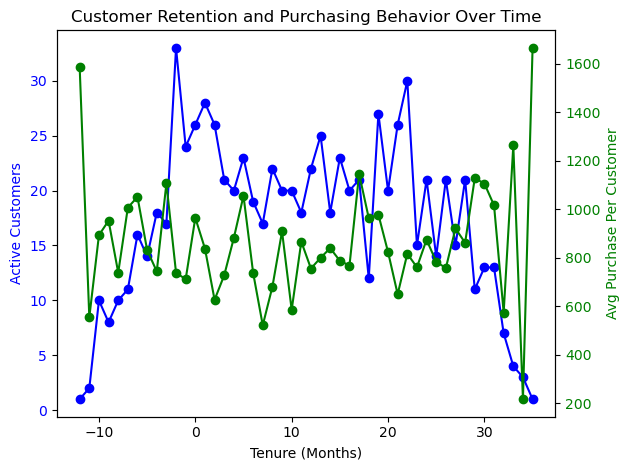

Customer Retention Metrics:
    TenureMonths  ActiveCustomers  AvgPurchasePerCustomer
0            -12                1             1585.360000
1            -11                2              553.920000
2            -10               10              892.939000
3             -9                8              952.788750
4             -8               10              738.327000
5             -7               11             1006.717273
6             -6               16             1050.573125
7             -5               14              831.479286
8             -4               18              743.281667
9             -3               17             1106.955882
10            -2               33              737.900303
11            -1               24              711.203333
12             0               26              964.396923
13             1               28              837.765714
14             2               26              626.240385
15             3               21           

In [236]:
df_c['SignupDate'] = pd.to_datetime(df_c['SignupDate'])

# Calculate the Customer Tenure in months
df_c['TenureMonths'] = ((df_c['TransactionDate'] - df_c['SignupDate']).dt.days // 30)

# Group customers by tenure and calculate purchasing behavior
customer_retention = (
    df_c.groupby('TenureMonths')
    .agg({
        'CustomerID': 'nunique',      # Unique active customers
        'TransactionID': 'count',    # Total transactions
        'TotalValue': 'sum'          # Total value of purchases
    })
    .reset_index()
    .rename(columns={'CustomerID': 'ActiveCustomers'})
)

# Calculate average purchase value per active customer
customer_retention['AvgPurchasePerCustomer'] = (
    customer_retention['TotalValue'] / customer_retention['ActiveCustomers']
)

# Plotting the retention analysis
plt.figure(figsize=(14, 8))

# Create a dual-axis line chart
fig, ax1 = plt.subplots()

# Plot Active Customers
ax1.set_xlabel('Tenure (Months)')
ax1.set_ylabel('Active Customers', color='blue')
ax1.plot(customer_retention['TenureMonths'], customer_retention['ActiveCustomers'], color='blue', marker='o', label='Active Customers')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Avg Purchase Per Customer
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Purchase Per Customer', color='green')
ax2.plot(customer_retention['TenureMonths'], customer_retention['AvgPurchasePerCustomer'], color='green', marker='o', label='Avg Purchase Per Customer')
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Customer Retention and Purchasing Behavior Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Print metrics for customer retention
print("Customer Retention Metrics:")
print(customer_retention[['TenureMonths', 'ActiveCustomers', 'AvgPurchasePerCustomer']])

Purchase Frequency Statistics:
Mean: 5.03
Median: 5.00
Mode: 5.00
Skew: 0.29
Kurtosis: -0.24

Average Spend Per Purchase Statistics:
Mean: 687.58
Median: 677.21
Mode: 82.36
Skew: 0.17
Kurtosis: 0.09


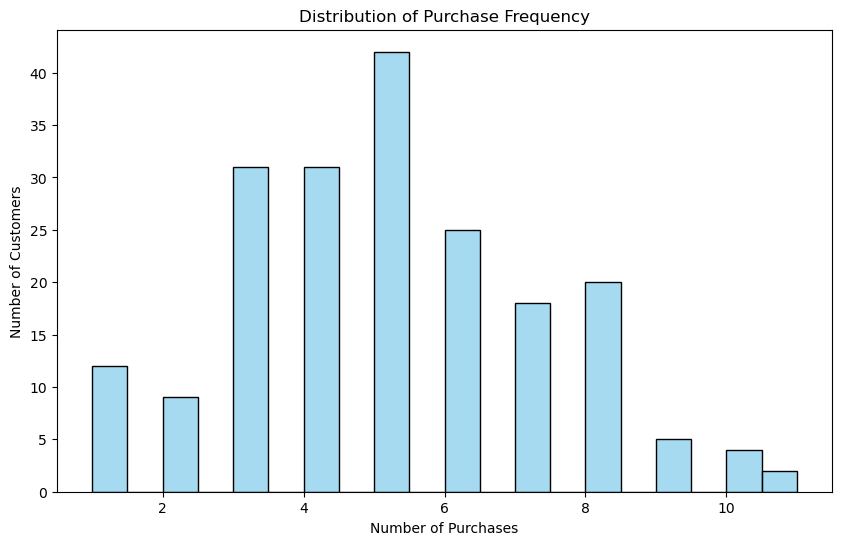

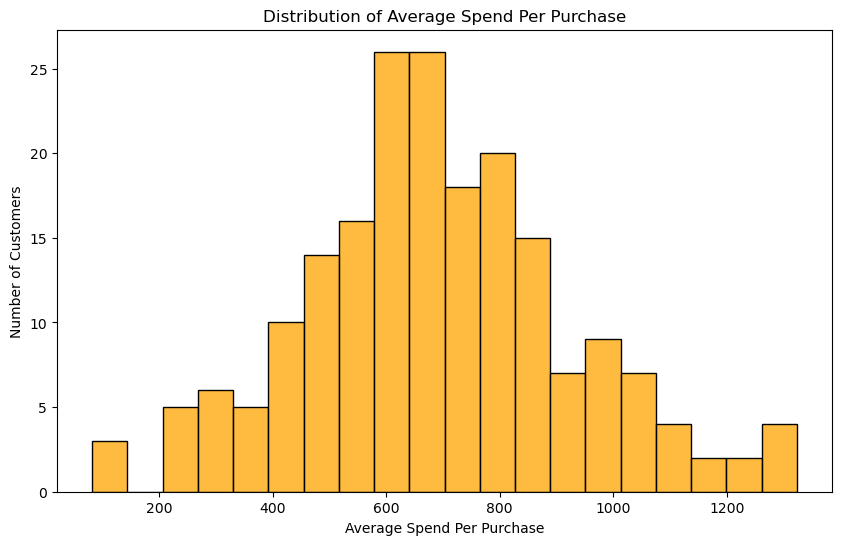

In [237]:
# Ensure TransactionDate and SignupDate are in datetime format
df_c['TransactionDate'] = pd.to_datetime(df_c['TransactionDate'])
df_c['SignupDate'] = pd.to_datetime(df_c['SignupDate'])

# 1. Repeat Purchases: Analyze repeat customers and their purchase frequency
repeat_purchases = (
    df_c.groupby('CustomerID')
    .agg({
        'TransactionID': 'count',  # Count the number of transactions per customer
        'TotalValue': 'sum'       # Sum up the total spending per customer
    })
    .reset_index()
    .rename(columns={'TransactionID': 'PurchaseFrequency', 'TotalValue': 'TotalSpend'})
)

# Add a column to identify repeat customers
repeat_purchases['IsRepeatCustomer'] = repeat_purchases['PurchaseFrequency'] > 1

# 2. Average Spend Per Customer
repeat_purchases['AvgSpendPerPurchase'] = (
    repeat_purchases['TotalSpend'] / repeat_purchases['PurchaseFrequency']
)

# Summary Statistics
purchase_freq = repeat_purchases['PurchaseFrequency']
avg_spend = repeat_purchases['AvgSpendPerPurchase']

# Calculate mean, median, mode, skew, and kurtosis for both PurchaseFrequency and AvgSpendPerPurchase
purchase_freq_stats = {
    'Mean': purchase_freq.mean(),
    'Median': purchase_freq.median(),
    'Mode': purchase_freq.mode()[0],  # mode() returns a series, take the first mode
    'Skew': purchase_freq.skew(),
    'Kurtosis': purchase_freq.kurtosis()
}

avg_spend_stats = {
    'Mean': avg_spend.mean(),
    'Median': avg_spend.median(),
    'Mode': avg_spend.mode()[0],  # mode() returns a series, take the first mode
    'Skew': avg_spend.skew(),
    'Kurtosis': avg_spend.kurtosis()
}

# Print statistics for both distributions
print("Purchase Frequency Statistics:")
for stat, value in purchase_freq_stats.items():
    print(f"{stat}: {value:.2f}")

print("\nAverage Spend Per Purchase Statistics:")
for stat, value in avg_spend_stats.items():
    print(f"{stat}: {value:.2f}")

# Optional: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Purchase Frequency
plt.figure(figsize=(10, 6))
sns.histplot(repeat_purchases['PurchaseFrequency'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Distribution of Average Spend Per Purchase
plt.figure(figsize=(10, 6))
sns.histplot(repeat_purchases['AvgSpendPerPurchase'], bins=20, kde=False, color='orange')
plt.title('Distribution of Average Spend Per Purchase')
plt.xlabel('Average Spend Per Purchase')
plt.ylabel('Number of Customers')
plt.show()
